In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# General imports
import numpy as np
import pandas as pd
import math as m
from itertools import product
import time as t

import pickle

from matplotlib import pyplot as plt

In [3]:
# Specific imports
from da_utils import plot_diff_all, plot_gem0_scan, write_gem0_offline, write_gem0_fromfile, write_gem0_fromcpo

In [56]:
# Most general variables
xlabels = ['te_value', 'ti_value', 'te_ddrho', 'ti_ddrho']
ylabels = ['te_transp_flux', 'ti_transp_flux']

n_fts=8

lookup_names_short = {
    "ti_value": "$T_{{i}}$",
    "ti.value": "$T_{{i}}$",
    "te_value": "$T_{{e}}$",
    "te.value": "$T_{{e}}$",
    "ti_ddrho": "$\\nabla T_{{i}}$",
    "ti.ddrho": "$\\nabla T_{{i}}$",
    "te_ddrho": "$\\nabla T_{{e}}$",
    "te.ddrho": "$\\nabla T_{{e}}$",
    "te_transp_flux": "$Q_{{e}}$",
    "te_transp.flux": "$Q_{{e}}$",
    "ti_transp_flux": "$Q_{{i}}$",
    "ti_transp.flux": "$Q_{{i}}$",
    'te_transp_flux_std': "$\\sigma[Q_{{e}}]$",
    'ti_transp_flux_std': "$\\sigma[Q_{{i}}]$",
    "te_transp_flux_cv": "$\\mathrm{CV}[Q_{{e}}]$",
    "ti_transp_flux_cv": "$\\mathrm{CV}[Q_{{i}}]$",
    "te_transp_flux_stem": "$\\mathrm{SEM}[Q_{{e}}]$",
    "ti_transp_flux_stem": "$\\mathrm{SEM}[Q_{{i}}]$",
    'te_transp_flux_relstem': "$\\mathrm{rSEM}[Q_{{e}}]$",
    'ti_transp_flux_relstem': "$\\mathrm{rSEM}[Q_{{i}}]$",
    'te_transp_flux_acn': "$\\mathrm{ACT}[Q_{{e}}]]$",
    'ti_transp_flux_acn': "$\\mathrm{ACT}[Q_{{i}}]]$",
    "rho": "$\\rho_{{tor}}^{{norm}}$",
    "profiles_1d_q": "$q$",
    "profiles_1d_gm3" : "$gm^{{3}}$",
    }

lookup_units = {
    "ti_value": "$eV$",
    "ti.value": "$eV$",
    "te_value": "$eV$",
    "te.value": "$eV$",
    "ti_ddrho": "$eV/m$",
    "te_ddrho": "$eV/m$",
    "te.ddrho": "$eV/m$",
    "ti.drho": "$eV/m$",
    "te_transp_flux": "$W/m^{{2}}$",
    "ti_transp_flux": "$W/m^{{2}}$",
    "te_transp.flux": "$W/m^{{2}}$",
    "ti_transp.flux": "$W/m^{{2}}$",
    "rho": "",
    "profiles_1d_q" : "",
    "profiles_1d_gm3" : "",
}


In [5]:
### To create GEM0 scan files:

date_now = '20240201'

#file_in = "../../muscle3/ref_train_data_5000.csv"
#file_in = "gem0_new_data_20231215.csv"
#file_in = "gem0py_lhc_20240110_all.csv"

# coming back to 5000 full grid GEM0 data
#file_in = "gem0_new_data_20231208.csv"
# ... but on corrected radial locations
#file_in = "gem0_new_data_20231215.csv"
# ... newly generated such reading
file_in = 'gem0py_new_20240201.csv'
# LHC sample of size 12000
#file_in = 'gem0py_new_20240123.csv'

modtype="gpr"
codename="gem0py"

### Read inputs
data = pd.read_csv(file_in)
data_x = data[xlabels]
data_y = data[ylabels]
x = np.array(data_x)

# Create scan files
print("Creating scan files")

remainder_file_path = f"scan_{codename}{modtype}_remainder_"
remainder_file_date = date_now
st_t = t.time()

scan_data = [[plot_gem0_scan(x,input_number=i,output_number=o, flag_plot=False, file_name_suf=date_now, extend_factor=0.05, \
                               cut_option='file', remainder_values=f"{remainder_file_path}{xlabels[i]}_{remainder_file_date}", \
                             ) for i in range(len(xlabels))] for o in range(len(ylabels))]
print("Time to create scan files: ", t.time()-st_t)

scan_data_perft = []

# Reshape dictionaries
for n_ft in range(n_fts):
     scan_data_perft.append({(f"{xlabels[i]}_{ylabels[j]}",k): scan_data[j][i][(f"ft{n_ft}",k)] for i,j,k in product(range(len(xlabels)),range(len(ylabels)),['x','y'])})	

# Write down scan files
#date_last = '20240116'

for n_ft in range(n_fts):
     s = scan_data_perft[n_ft]
     spd = pd.DataFrame.from_dict(s)
     spd.to_csv(f"scan_{codename}py_{date_now}_ft{n_ft}.csv")


Creating scan files


FileNotFoundError: [Errno 2] No such file or directory: 'scan_gem0pygpr_remainder_te_value_20240201_ft0.csv'

In [ ]:
# # Test: reading a multi-indexed dataframe
# test_df = pd.read_csv("scan_gem0_remainder_te_value.csv", header=[0, 1], index_col=0,)

# test_df = test_df[(f"ft{0}", xlabels[0])]

# test_array = np.array(test_df)
# print(test_array)

In [ ]:
# To create surrogate scan files:

#!cd ../../../EasySurrogate && pip install . && cd tests/gem_gp && for((i=0;i<8;i++)); do python3 test_model_ann.py ${i} 20231218 && cp scan_${i}.csv ../../../MFW/uq/basicda/scan_gem0surr_20240105_ft${i}.csv ; done && cd ../../../MFW/uq/basicda

!cd ../../../EasySurrogate && pip install . && cd tests/gem_gp && for((i=0;i<8;i++)); do python3 test_model.py ${i} 20231212 && cp scan_${i}.csv ../../../MFW/uq/basicda/scan_gem0surr_20240105_ft${i}.csv ; done && cd ../../../MFW/uq/basicda


In [10]:
# To plot the difference between GEM0 and surrogate, and their comparison

date = '20240201'
surtype = 'gpr'
codename = 'gem0py'

file_pref_gem0 = f"{codename}py_{date}"
file_pref_surr = f"{codename}{surtype}_{date}"

save_file = f"{codename}vs{surtype}_{date}_0.pdf"

plot_diff_all(file_pref_1=file_pref_gem0, file_pref_2=file_pref_surr, save_file=save_file)

!mv *gem0pyvsgpr_20240201_0.pdf ../../..

In [ ]:
# To generate a dataset of LHCS GEM0 evaluations
#nft = 8
date = '20240125'

file_in = 'gem0py_new_20240123.csv'

save_filename=f"gem0py_lhc_{date}_ft"

n_samples_p_ft = 1500

for i in range(n_fts):
    
    print(f"flux tube number: {i}")

    write_gem0_offline(n_samples=n_samples_p_ft, n_ft=i, filename=save_filename, file_in=file_in)


In [ ]:
# To generate an expanded dataset of GEM0 evaluations

from da_utils import write_gem0_expanded

datenow = '20240126'
save_filename = f"gem0py_new_{datenow}.csv"

file_old = "gem_648_data.csv"

expand_factor = 1.0

write_gem0_expanded(file_old, save_filename, expand_factor=expand_factor, calloption=2)

In [ ]:
# Add new readings to a training data set

from da_utils import merge_result_csv

code="gem0py"

date_old = "20240126"
date_new = "20240129"
date_now = "20240129"

file_old = f"{code}_new_{date_old}.csv"
file_new = f"test_{code}_{date_new}.csv"
file_tot = f"{code}_new_{date_now}.csv"

merge_result_csv([file_old, file_new], file_tot)


In [ ]:
# To generate a dataset of GEM0 evaluations for given input file

from da_utils import write_gem0_fromfile

# 1) Testing an new point saved by a workflow during the run
# filename_in = 'new_surrogate_points_it98.csv'
# filename_out = 'test_gem0py_20240129.csv'

# 2) A sample generated as a full grid around the final point of the worflow
# ATTENTION: last coretransp, coreprof, equilibrium have to be copied to /uq/basicda/
date = '20240202'
filename_in = f"gem0py_newpoint_{date}.csv"
filename_out = f"gem0py_new_{date}.csv"

write_gem0_fromfile(filename_in, filename_out)


In [8]:
# temporary: merge generated csv file into one, adding a column with the flux tube number

import glob

date = '20240125'
path = f"gem0py_lhc_{date}_ft*.csv" 

all_files = glob.glob(path)
df_from_each_file = [pd.read_csv(f) for f in all_files]

for i in range(len(df_from_each_file)):
    df_from_each_file[i]['ft'] = i

df_merged = pd.concat(df_from_each_file, ignore_index=True, sort=False)
df_merged.to_csv( f"gem0py_lhc_{date}_all.csv")


In [ ]:
# copy EasySurrogate campaign objects and replace model objects

In [ ]:
# Reformating: read the M3-WF resulting CSV and save the last point in format row: values, columns: Te/i gradTe/i ft

#import re

naming_map = {
    'te_value' : 'Te',
    'ti_value' : 'Ti',
    'te_ddrho' : 'dTe',
    'ti_ddrho' : 'dTi',
    'te_transp_flux': 'flux-Te',
    'ti_transp_flux': 'flux-Ti',    
    'diff_te': 'diff-Te',
    'diff_ti': 'diff-Ti',
    'vconv_te': 'vconv-Te',
    'vconv_ti': 'vconv-Ti',
}

dateorig = '20240202'
datenow  = '20240202'
code = 'gem0'
file_in = f"res_{code}_{dateorig}.csv"
file_out = f"final_point_{code}_{datenow}.csv"

#def find(name, data=data): return [ s for s in np.array(data.columns) if re.findall(name, s) ]

header = [v+'-ft'+str(j) for (k,v),j in product(naming_map.items(),range(1,9))]

data = pd.read_csv(file_in, sep=' ', header=None, names=header, usecols=[i for i in range(len(header))])

#print(header) ###DEBUG
#print(data.iloc[0]) ###DEBUG
#print(data.describe()) ##DEBUG

last_ind = -1
last_reading = data.iloc[last_ind]

nfts = 8

data_list_new = []

for i in range(nfts):

    element = {x:last_reading[f"{naming_map[x]}-ft{i+1}"] for x in xlabels}
    element['ft'] = i

    data_list_new.append(element)

data_new = pd.DataFrame(data_list_new)
data_new.to_csv(file_out)


In [ ]:
# Call pyGEM0 for single file - test why calling it for CPO and a value differs!

dateorig = '20240201'
datenow  = '20240201'
code = 'gem0'

file_in = f"final_point_{code}_{datenow}.csv"
file_out = f"test.csv"

pr_filename = 'gem0_coreprof_in.cpo'
eq_filename = 'gem0_equilibrium_in.cpo'
tr_filename = 'gem0_coretransp_in.cpo'

write_gem0_fromcpo(pr_filename, eq_filename, tr_filename)

write_gem0_fromfile(file_in, file_out)

In [ ]:
# Create a new full-product grid of profile values around a given point

from da_utils import write_profs_fromfile_grid

date = '20240202'

file_in  = f"final_point_gem0_{date}.csv"
file_out = f"gem0py_newpoint_{date}.csv"

write_profs_fromfile_grid(file_in, file_out, num_steps=2)

In [6]:
# Save data on the Retraining algo convergence


# filename = 'retr_algo_conv_2'
# data_dict = {
#     'it'               : [0, 1, 2, 3, 4, 5,],
#     'd_fin_gtstst' :     [176495.8859822613, 603.4057452947857, 396.9942234, 396.9009948, 396.9008822, 396.9008932, ] ,
#     #'d_fin_gtststs'    : [603.4057452947857, 396.9942234314026, 396.9009948076408, 396.90088219565587, 396.90089323357563,],
#     'd_fin_prevfin'    : [177104.3934354466, 277.10771108302293, 1.0398953618411646, 0.01074603640113972, 0.00034824677236947895, 'NaN' ],
# }


# filename = 'retr_algo_conv_eqmetr'
# data_dict = {
#     'it'               : [0, 1, 2, 3, 4, 5, 6, ],
#     'd_fin_gtstst' : [88251.68127, 6684.846317, 561.1207998, 569.6313399, 569.6648542, 569.6658439, 569.665872],
#     'd_fin_prevfin'    : [81224.62621, 6415.35766, 35.08944019, 0.3278917823, 0.006191929644,0.0001025095243, 'NaN',],
# }


# filename = 'retr_algo_conv_eqmetr_eqdata'
# data_dict = {
#     'it'               : [0, 1, 2, 3, 4, 5, 6, ],
#     'd_fin_gtstst' : [88251.68127, 5277.631086, 562.533902, 564.4172435, 564.9457487, 564.9453184, 564.9449925,],
#     'd_fin_prevfin'    : [82685.02261, 4994.789405, 8.146175325, 5.238329788, 0.009808316204, 0.0003694048894, 'NaN',],
# }

# filename = 'retr_algo_conv_eqmetr_eqdata_srrmse2'
# data_dict = {
# 'it'               : [0, 1, 2, 3, 4, 5, ],
# 'd_fin_gtstst' : [0.7046672437, 0.02978857187, 0.004385027738, 0.004408899249, 0.004411394325, 0.004411401852, ],
# 'd_fin_prevfin' : [0.6812879224, 0.02796395444, 0.000072018865, 0.000070543312, 0.00000013917, 0.000000004093, ],
# }

# filename = 'retr_algo_conv_eqmetr_eqdata_srrmse2_2'
# data_dict = {
#     'it'               : [0, 1, 2, 3, 4, 5, 6, 7, 8, ],
#     'd_fin_prevfin' : [0.6824711423, 0.02903202349, 0.000348125067, 0.000052542876, 0.000002730252, 0.000000031545, 0.000000014315, 0.000000014002, None],
#     'd_fin_gtstst' : [0.7046672437, 0.02886089423, 0.001310119925, 0.00127598976, 0.001278838821, 0.001278818398, 0.001278819154, 0.001278819526, 0.001278819176, ],
# }

filename = 'retr_algo_conv_eqmetr_eqdata_srrmse2_3'
data_dict = {
    'it'               : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ],
    'd_fin_prevfin' : [0.6785059115, 0.03645782415, 0.005233973111, 0.002317343381, 0.001793666762, 0.000009372511, 0.000016720011, 0.000020403789, 0.000178375865, 0.000019251448, None],
    'd_fin_gtstst' : [0.7046672437, 0.03517673425, 0.005428800155, 0.000432914643, 0.002225769334, 0.000515657608, 0.000513420452, 0.00050718022, 0.000492849832, 0.000361247795, 0.000350114032, ],
}


data_df = pd.DataFrame(data_dict)
data_df.to_csv(f"{filename}.csv")

[-1.6724462656925538, -1.098270602717117, -0.5052322483587428]

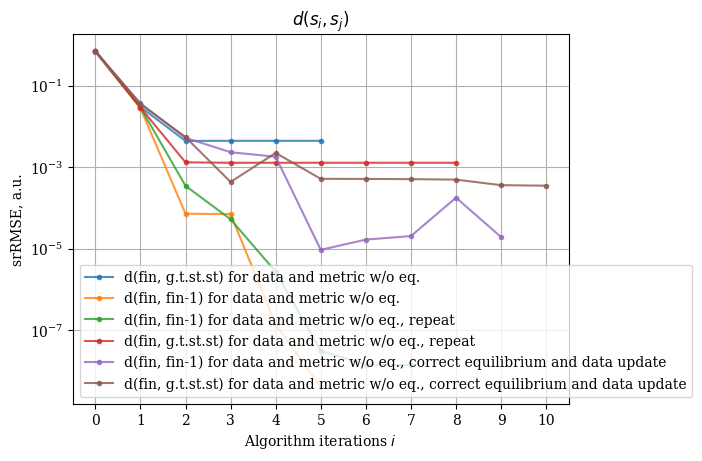

In [11]:
# Plot convergence of state disctance for Retraining algo
import sys
sys.path.append(f"/u/yyudin/code/MFW/muscle3/src/")
from muscle_utils.utils import plot_state_conv

# A) w/o equil
# filenames = ['retr_algo_conv_2', ]
# labels = ['data and metric w/o eq.',]

# B) with equil
#filenames = ['retr_algo_conv_eqmetr', 'retr_algo_conv_eqmetr_eqdata']
#labels = ['data w/o eq.', 'data w/ eq.']

# C) srRMSE2
filenames = [
    'retr_algo_conv_eqmetr_eqdata_srrmse2', 
    'retr_algo_conv_eqmetr_eqdata_srrmse2_2',
    'retr_algo_conv_eqmetr_eqdata_srrmse2_3',
    ]
labels = [
    'data and metric w/o eq.',
    'data and metric w/o eq., repeat', #, repeat'
    'data and metric w/o eq., correct equilibrium and data update',
     ]

data_df_list = []

for filename in filenames:
    data_df_list.append(pd.read_csv(f"{filename}.csv"))

plot_state_conv(data_df_list, filenames[0], normalised=False, label_sufixes=labels)


In [15]:
# # Testing the ProfileCPODecoder

# import os

# import easyvvuq as uq

# from base.profile_cpo_decoder import ProfileCPODecoder

# test_run_file = 'test_easyvvuq'
# test_run_dir = os.path.abspath(test_run_file)

# decoder = ProfileCPODecoder(cpo_filename='ets_coreprof_out.cpo')

# qoi = decoder.parse_sim_output({'run_dir':test_run_dir})

# print(qoi)

{'te_value_0': 1720.00051697186, 'ti_value_0': 1727.2526321474}


/tmp/ipykernel_5013/513445938.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['ft'].iloc[n_s_p_ft*(n_ft):n_s_p_ft*(n_ft+1)]= n_ft
/tmp/ipykernel_5013/513445938.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['ft'].iloc[n_s_p_ft*(n_ft):n_s_p_ft*(n_ft+1)]= n_ft
/tmp/ipykernel_5013/513445938.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['ft'].iloc[n_s_p_ft*(n_ft):n_s_p_ft*(n_ft+1)]= n_ft
/tmp/ipyke

Mean for Qe:
[ 79228.64128179 119782.17164565  14786.2287659   28731.62084013
  14111.87698176  20771.97286562  17563.46808502  32321.70316331]
naive CV for Qe:
[0.27498433 0.04017304 0.08557491 0.03862082 0.04363883 0.0378758
 0.05381561 0.08843446]
unweighted CV for Qe:
[0.33193058 0.06292552 0.16079804 0.0458399  0.04394751 0.03812843
 0.04699886 0.07347231]
weighted naive CV for Qe:
[0.2716535697803461, 0.04090879636006357, 0.08925920416389058, 0.04025090033650067, 0.04335489653168156, 0.03763990912924431, 0.05261851253811138, 0.08945178995622409]
weighted CV for Qe:
[0.2716535697803461, 0.04090879636006357, 0.08925920416389058, 0.04025090033650067, 0.04335489653168156, 0.03763990912924431, 0.05261851253811138, 0.08945178995622409]
Mean for Qi:
[ 40866.691405   439297.45962307   4290.70964164  26810.75343807
  30455.17763922  63463.96477882  58261.6303799   84816.11148619]
naive CV for Qi:
[0.23704631 0.04250256 0.0820291  0.04455335 0.04031437 0.04840126
 0.06963294 0.11072505]
un

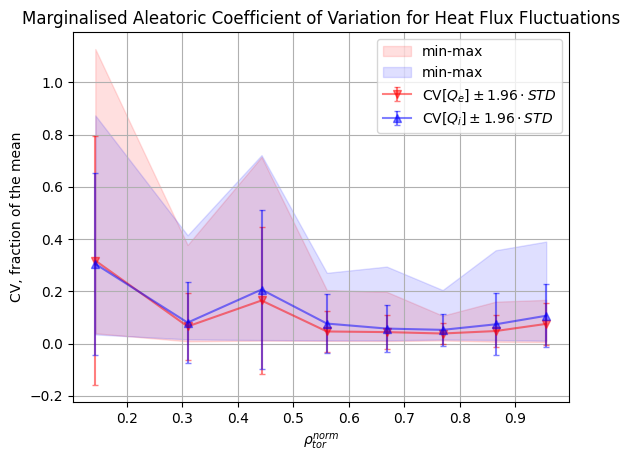

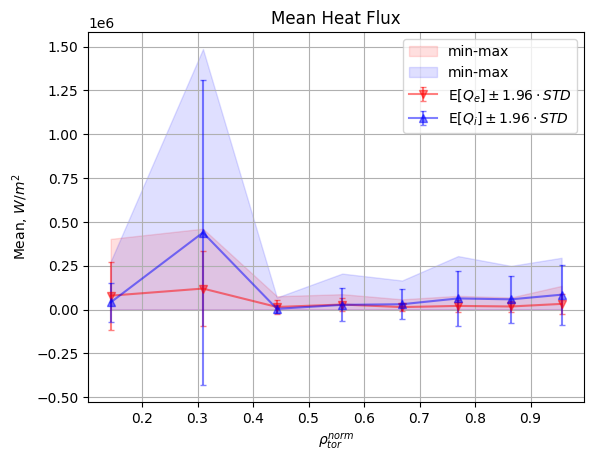

In [11]:
# To get the idea of flux variance as a function of rho (and temeperatures, gradients,...)

ft_coords = [0.143587306141853 , 0.309813886880875 , 0.442991137504578 , 0.560640752315521 , 0.668475985527039 , 0.769291400909424 , 0.864721715450287 , 0.955828309059143]

alpha_transp = 0.5

sp_cmap = {'e': 'r', 'i':'b'}
sp_mmap = {'e': 'v', 'i': '^'}

species = ['e', 'i']
filenames = [f"resuq_main_t{sp}_transp_flux_all_csldvnei_43.csv" for sp in species]

data_dfs = [pd.read_csv(filename) for filename in filenames]

n_params = 4
n_p_p_d = 3
n_s_p_ft = n_p_p_d ** n_params
n_fts = 8
    
# ATTENTION: to get real average w.r.t. prior uncertainty on profiles, use weights from G-Legendre quadrature (n=3)
mean_weights_1d = [0.5555555555555556, 0.8888888888888888, 0.5555555555555556]
mean_weights_full = [m.prod(x) for x in product(mean_weights_1d, repeat=n_params)]
weighted_avg = lambda data,valcol,weightcol: (data[valcol]*data[weightcol]).sum() / data[weightcol].sum()
# -> looks like weighting does not change the resulting CV and AVG much
# TODO can get from /campaign_csldvnei_43.db : uq.Campaign(name,db_location).get_active_sampler()._weights

fig_cov, ax_cov = plt.subplots()
fig_avg, ax_avg = plt.subplots()

data_to_save = []

for data_df,sp in zip(data_dfs, species):

    # add ft column
    data_df = data_df.reindex(columns=data_df.columns.tolist() + ['ft'])
    for n_ft in range(n_fts):
        data_df['ft'].iloc[n_s_p_ft*(n_ft):n_s_p_ft*(n_ft+1)]= n_ft
    
    # Get the average of t?_transp_flux_std for ft
    colname1 = f"t{sp}_transp_flux_std"
    t_transp_flux_stds = np.array([data_df[data_df['ft']==n_ft][colname1].mean() for n_ft in range(n_fts)])

    colname2 = f"t{sp}_transp_flux"
    t_transp_flux_avgs = np.array([data_df[data_df['ft']==n_ft][colname2].mean() for n_ft in range(n_fts)])

    # (the spread of the mean values)
    t_transp_flux_avg_std = np.array([data_df[data_df['ft']==n_ft][colname2].std() for n_ft in range(n_fts)])
    t_transp_flux_avg_min = np.array([data_df[data_df['ft']==n_ft][colname2].min() for n_ft in range(n_fts)])
    t_transp_flux_avg_max = np.array([data_df[data_df['ft']==n_ft][colname2].max() for n_ft in range(n_fts)])

    t_transp_flux_covs = np.array([std/abs(avg) for std,avg in zip(t_transp_flux_stds, t_transp_flux_avgs)])

    print(f"Mean for Q{sp}:\n{t_transp_flux_avgs}")
    #ax_avg.plot(ft_coords, t_transp_flux_avgs, label=f"$\\mathrm{{E}}[Q_{sp}]$", marker='.', alpha=alpha_transp)
    ax_avg.errorbar(ft_coords, 
                    t_transp_flux_avgs, 
                    yerr=1.96*np.array(t_transp_flux_avg_std), 
                    label=f"$\\mathrm{{E}}[Q_{sp}] \\pm {1.96} \\cdot STD$", 
                    marker=sp_mmap[sp], 
                    color=sp_cmap[sp],
                    capsize=2, 
                    alpha=alpha_transp)
    ax_avg.fill_between(x=ft_coords,
                         y1=t_transp_flux_avg_min, 
                         y2=t_transp_flux_avg_max, 
                         alpha=0.25*alpha_transp, 
                         color=sp_cmap[sp],
                         label=f"min-max")

    # Output
    print(f"naive CV for Q{sp}:\n{t_transp_flux_covs}")
    #ax_cov.plot(ft_coords, t_transp_flux_covs, label=f"unweighted naive CV[Q_{sp}]", marker='.', alpha=alpha_transp)

    # Invert the sum and division operations!
    colname3 = f"t{sp}_transp_flux_cov"
    data_df[colname3] = data_df[colname1] / abs(data_df[colname2])
    t_transp_flux_tcovs = np.array([data_df[data_df['ft']==n_ft][colname3].mean() for n_ft in range(n_fts)])
    print(f"unweighted CV for Q{sp}:\n{t_transp_flux_tcovs}")
    #ax_cov.plot(ft_coords, t_transp_flux_tcovs, label=f"unweighted CV[Q_{sp}]", marker='.', alpha=alpha_transp)

    # Get the spread of CV values (for the flux tube)
    t_transp_flux_tcov_std = np.array([data_df[data_df['ft']==n_ft][colname3].std() for n_ft in range(n_fts)])
    t_transp_flux_tcov_min = np.array([data_df[data_df['ft']==n_ft][colname3].min() for n_ft in range(n_fts)])
    t_transp_flux_tcov_max = np.array([data_df[data_df['ft']==n_ft][colname3].max() for n_ft in range(n_fts)])

    # Add the weight column
    data_df = data_df.reindex(columns=data_df.columns.tolist() + ['weight'])
    for n_ft in range(n_fts):
        data_df['weight'].iloc[n_s_p_ft*(n_ft):n_s_p_ft*(n_ft+1)] = mean_weights_full

    # Get weighted average of t?_transp_flux_std for ft
    t_transp_flux_wstds  = [weighted_avg(data_df[data_df['ft']==n_ft], colname1, 'weight') for n_ft in range(n_fts)]
    t_transp_flux_wavgs  = [weighted_avg(data_df[data_df['ft']==n_ft], colname2, 'weight') for n_ft in range(n_fts)]
    t_transp_flux_twcovs = [weighted_avg(data_df[data_df['ft']==n_ft], colname3, 'weight') for n_ft in range(n_fts)]
    t_transp_flux_wcovs  = [std/abs(avg) for std,avg in zip(t_transp_flux_wstds, t_transp_flux_wavgs)]

    print(f"weighted naive CV for Q{sp}:\n{t_transp_flux_wcovs}")
    #ax_cov.plot(ft_coords, t_transp_flux_wcovs, label=f"weighted naive CV[Q_{sp}]", marker='.', alpha=alpha_transp)

    print(f"weighted CV for Q{sp}:\n{t_transp_flux_wcovs}")
    #ax_cov.plot(ft_coords, t_transp_flux_twcovs, label=f"CV[$Q_{sp}$]", marker='.', alpha=alpha_transp)
    ax_cov.errorbar(ft_coords, 
                    t_transp_flux_twcovs,
                      yerr=1.96*t_transp_flux_tcov_std, 
                      label=f"$\\mathrm{{CV}}[Q_{sp}] \\pm {1.96} \\cdot STD$", 
                      marker=sp_mmap[sp], 
                      color=sp_cmap[sp],
                      capsize=2, 
                      alpha=alpha_transp)
    ax_cov.fill_between(x=ft_coords, 
                        y1=t_transp_flux_tcov_min, 
                        y2=t_transp_flux_tcov_max, 
                        alpha=0.25*alpha_transp, 
                        color=sp_cmap[sp],
                        label=f"min-max")

    # # save a new dataframe
    # #data_df.drop('name', axis=1)
    # #data_df.drop('index')
    # data_to_save.append(data_df)

# df_to_save = pd.concat(data_to_save, axis=1)
# df_to_save.to_csv("gem_new_baseline.csv")

ax_cov.legend(loc='best')
ax_cov.grid('both')
ax_cov.set_xlabel(f"$\\rho_{{tor}}^{{norm}}$")
ax_cov.set_ylabel(f"CV, fraction of the mean")
ax_cov.set_title(f"Marginalised Aleatoric Coefficient of Variation for Heat Flux Fluctuations")
fig_cov.savefig('gem_flux_cov_pft.pdf')

ax_avg.legend(loc='best')
ax_avg.grid('both')
ax_avg.set_xlabel(f"$\\rho_{{tor}}^{{norm}}$")
ax_avg.set_ylabel(f"Mean, $W/m^{{2}}$")
ax_avg.set_title(f"Mean Heat Flux")
fig_avg.savefig('gem_flux_avg_pft.pdf')

In [6]:
# # Read and plot the aleatoric UQ campaign results
# import pickle

# filename = 'result_aleatoric_wf.pickle'
# filename = '../result_aleatoric_wf.pickle.20240220_1529'

# with open(filename, "r") as f:
#     data = pickle.load(f)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

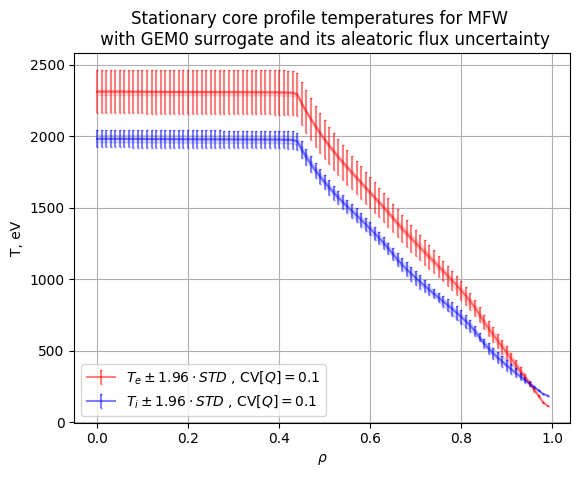

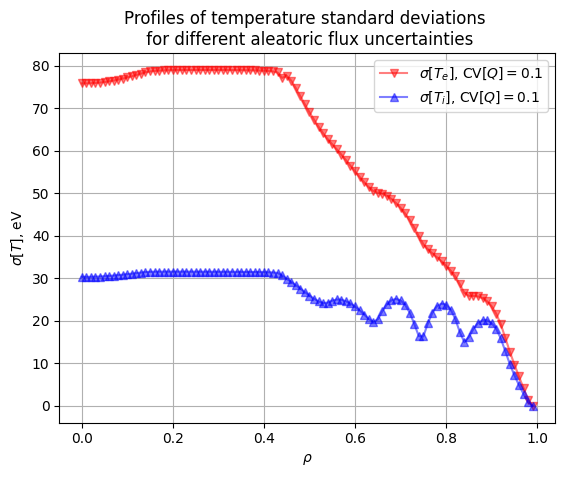

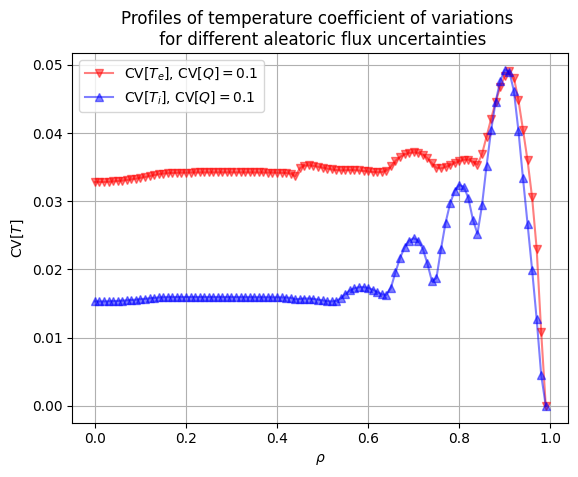

In [5]:
# Read a list of .pickle files with results of UQ campaign to analyse aleatroic uncertainty
#   in core profiles and plot its: mean+/2sigma for profiles, sigma_y(sigma_x) dependency

import numpy as np
from matplotlib import pyplot as plt
import pickle

alpha_transp = 0.5

ind_coords = [0, 15, 30, 45, 57, 67, 77, 87, 95]
ft_coords = [0.143587306141853 , 0.309813886880875 , 0.442991137504578 , 0.560640752315521 , 0.668475985527039 , 0.769291400909424 , 0.864721715450287 , 0.955828309059143]
species = ['e', 'i']

color_step = 0.25
color_num = 10
# sp_cmaps = {'e':[(1.-color_step*i, 0.5*color_step*i, 0.5*color_step*i) for i in range(0,color_num)], 
#             'i':[(color_step*i,    0.25*color_step*i,    1.-color_step*i ) for i in range(0,color_num)]}

sp_cmaps = {'e':[(1.-color_step*i, 0., color_step*i ) for i in range(0,color_num)], 
            'i':[(color_step*i ,   0., 1.-color_step*i ) for i in range(0,color_num)],
            'a':[(1.-color_step*3*i, 0., color_step*3*i) for i in range(0,color_num)]}

sp_mmap = {'e':'v', 'i':'^'}

# Read the files
# # A)
# result_filename_list = ['../result_aleatoric_wf.pickle.20240220_1750', '../result_aleatoric_wf.pickle.20240220_1817']
# cov_inputs = [0.05, 0.1,] # 0.25]

# # B)
# result_filename_list = ['../result_aleatoric_wf_cv0.01.pickle', '../result_aleatoric_wf_cv0.05.pickle']
# cov_inputs = [0.01, 0.05]

# # C)
# result_filename_list = ['../results_aletoric_20240222/result_aleatoric_wf_cv0.01.pickle', '../results_aletoric_20240222/result_aleatoric_wf_cv0.05.pickle', '../results_aletoric_20240222/result_aleatoric_wf_cv0.1.pickle', '../results_aletoric_20240222/result_aleatoric_wf_cv0.2.pickle', '../results_aletoric_20240222/result_aleatoric_wf_cv0.25.pickle']
# cov_inputs = [float(".".join([f.split('.')[-3][-1],f.split('.')[-2]])) for f in result_filename_list]

# # D)
# result_filename_list = ['../results_aletoric_20240222/result_aleatoric_wf_cv0.05.pickle', '../results_aletoric_20240222/result_aleatoric_wf_cv0.25.pickle']
# cov_inputs = [float(".".join([f.split('.')[-3][-1],f.split('.')[-2]])) for f in result_filename_list]
# output_columns =  ["te_value_0", "te_value_15", "te_value_30", "te_value_45", "te_value_57", "te_value_67", "te_value_77", "te_value_87", "te_value_95", 
#                    "ti_value_0", "ti_value_15", "ti_value_30", "ti_value_45", "ti_value_57", "ti_value_67", "ti_value_77", "ti_value_87", "ti_value_95",]

# #output_columns = [f"t{sp}_value_{i}" for sp,i in product(['e','i'],[i for i in range(100)])]

# E) GEM 8*3**4 data
result_filename_list = ['../results_aleatoric_gem_data/result_aleatoric_wf_ns32_cv0.1.pickle']
cov_inputs = [float(".".join([f.split('.')[-3][-1],f.split('.')[-2]])) for f in result_filename_list]
ind_coords = [i for i in range(100)]
output_columns = [f"t{sp}_value_{i}" for sp,i in product(['e','i'],ind_coords)]

data_list = []
# should be (at least) 3D data-structure: n_qoi x n_statistics x n_runs
for filename in result_filename_list:
    with open(filename, "rb") as f:
        data = pickle.load(f)
    #data_list.append(data.raw_data['statistical_moments'])
    data_list.append(data.raw_data)

## Mean +/- confidence intervals
sigma_factor = 1.96
fig_prof, ax_prof = plt.subplots()
fig_sigrho, ax_sigrho = plt.subplots()
fig_covrho, ax_covrho = plt.subplots()

for run_i, data in enumerate(data_list):
    for sp in species:
        y    = np.array([float(data['statistical_moments'][f"t{sp}_value_{c}"]['mean'][0][0]) for c in ind_coords])
        std  = np.array([float(data['statistical_moments'][f"t{sp}_value_{c}"]['std'][0][0]) for c in ind_coords])
        yupp = np.array([float(data['percentiles'][f"t{sp}_value_{c}"]['p90'][0]) for c in ind_coords])
        ylow = np.array([float(data['percentiles'][f"t{sp}_value_{c}"]['p10'][0]) for c in ind_coords])
        cov  = np.array([std_j / abs(y_j) for y_j,std_j in zip(y,std)])
        #std_mult = [sigma_factor * s for s in std]
        #print(type(std[0]))

        ax_prof.errorbar(x=np.array(ind_coords)/100, 
                        y=y,
                        yerr=std*sigma_factor,
                        alpha=alpha_transp,
                        capsize=1,
                        color=sp_cmaps[sp][run_i],
                        #marker=sp_mmap[sp],
                        label=f"$T_{sp} \\pm {sigma_factor} \\cdot STD$ , $\\mathrm{{CV}}[Q]={cov_inputs[run_i]}$"
                        )

        ax_prof.fill_between(x=np.array(ind_coords)/100,
                             y1=ylow,
                             y2=yupp,
                             alpha=0.25*alpha_transp,
                             color=sp_cmaps[sp][run_i],
                             #label=f"$T_{sp} \\pm {sigma_factor} \\cdot STD$ , $\mathrm{{CV}}[Q]={cov_inputs[run_i]}$"
                             )

        ax_sigrho.plot(np.array(ind_coords)/100,
                       std,
                       alpha=alpha_transp,
                       marker=sp_mmap[sp],
                       color=sp_cmaps[sp][run_i],
                       label=f"$\\sigma[T_{sp}]$, $\\mathrm{{CV}}[Q]={cov_inputs[run_i]}$",
                      )             

        ax_covrho.plot(np.array(ind_coords)/100,
                       cov,
                       alpha=alpha_transp,
                       marker=sp_mmap[sp],
                       color=sp_cmaps[sp][run_i],
                       label=f"$\\mathrm{{CV}}[T_{sp}]$, $\\mathrm{{CV}}[Q]={cov_inputs[run_i]}$",
                      )             

ax_prof.set_xlabel(f"$\\rho$")
ax_prof.set_ylabel(f"T, eV")
ax_prof.set_title(f"Stationary core profile temperatures for MFW \n with GEM0 surrogate and its aleatoric flux uncertainty")
ax_prof.grid('both')
ax_prof.legend(loc='best') 
fig_prof.savefig('gem0surr_aleatoric_profiles.pdf')

ax_covrho.set_xlabel(f"$\\rho$")
ax_covrho.set_ylabel(f"$\\mathrm{{CV}}[T]$")
ax_covrho.set_title(f"Profiles of temperature coefficient of variations \n for different aleatoric flux uncertainties")
ax_covrho.grid('both')
ax_covrho.legend(loc='best') 
fig_covrho.savefig('gem0surr_aleatoric_covrho.pdf')

ax_sigrho.set_xlabel(f"$\\rho$")
ax_sigrho.set_ylabel(f"$\\sigma[T]$, eV")
ax_sigrho.set_title(f"Profiles of temperature standard deviations \n for different aleatoric flux uncertainties")
ax_sigrho.grid('both')
ax_sigrho.legend(loc='best') 
fig_sigrho.savefig('gem0surr_aleatoric_sigrho.pdf')


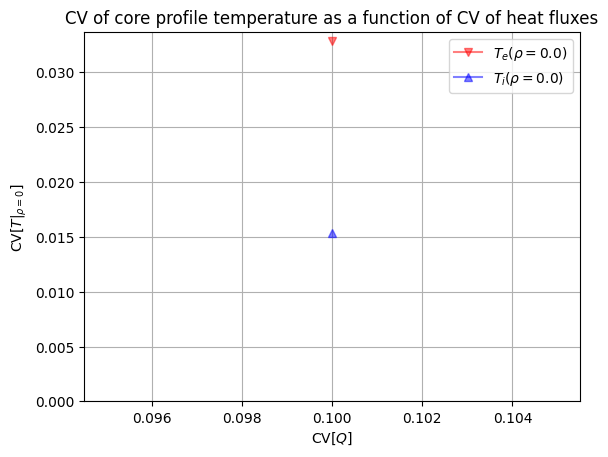

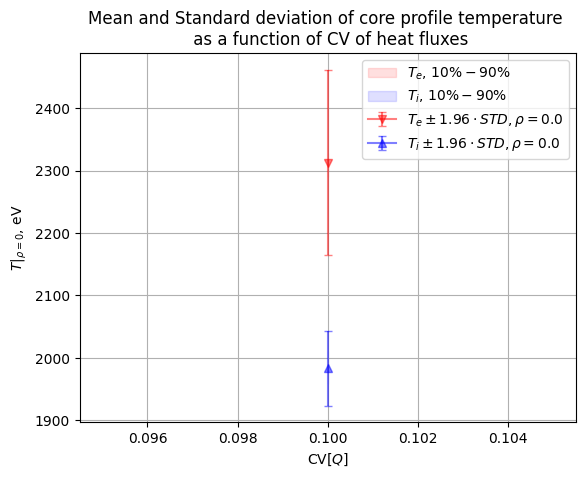

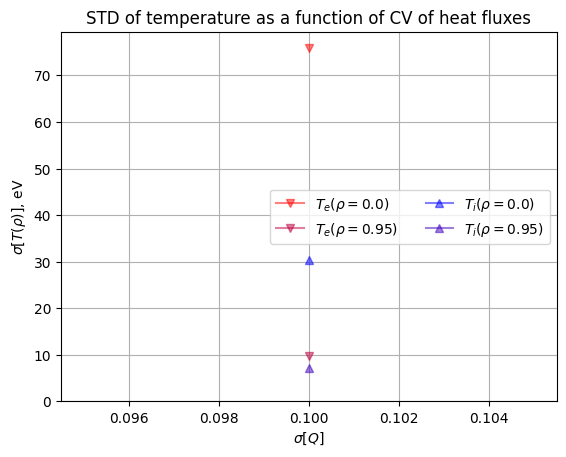

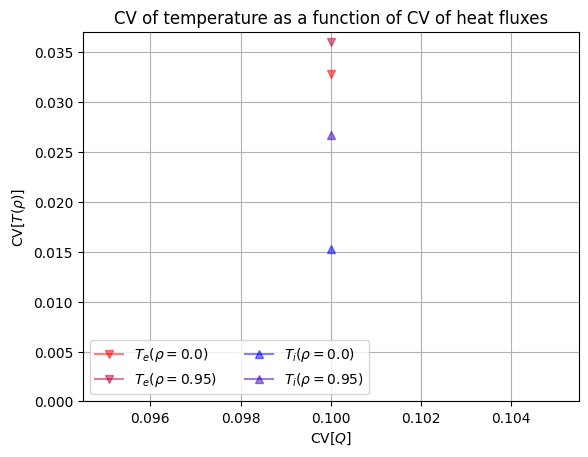

In [6]:
##  Sigma-of-sigma plot
import numpy as np
from matplotlib import pyplot as plt
import pickle

species = ['e', 'i']

# #1) 8 flux tubes to be plotted
# ind_coords = [0, 15, 30, 45, 57, 67, 77, 87, 95]
# ft_coords = [0.143587306141853 , 0.309813886880875 , 0.442991137504578 , 0.560640752315521 , 0.668475985527039 , 0.769291400909424 , 0.864721715450287 , 0.955828309059143]
# output_columns =  ["te_value_0", "te_value_15", "te_value_30", "te_value_45", "te_value_57", "te_value_67", "te_value_77", "te_value_87", "te_value_95", 
#                    "ti_value_0", "ti_value_15", "ti_value_30", "ti_value_45", "ti_value_57", "ti_value_67", "ti_value_77", "ti_value_87", "ti_value_95",]

#2) first & last flux tube to be plotted
ind_coords = [0, 95]
ft_coords = [0.143587306141853, 0.955828309059143]
output_columns =  ["te_value_0", "te_value_95", 
                   "ti_value_0", "ti_value_95",]

# #3) Selected flux tubes to be plotted
# ind_coords = [0, 95]
# ft_coords = [0.143587306141853, 0.955828309059143]
# output_columns =  ["te_value_0", "te_value_95", 
#                    "ti_value_0", "ti_value_95",]


#D)
result_filename_list = ['../results_aletoric_20240222/result_aleatoric_wf_cv0.01.pickle', '../results_aletoric_20240222/result_aleatoric_wf_cv0.05.pickle', '../results_aletoric_20240222/result_aleatoric_wf_cv0.1.pickle', '../results_aletoric_20240222/result_aleatoric_wf_cv0.2.pickle', '../results_aletoric_20240222/result_aleatoric_wf_cv0.25.pickle']
cov_inputs = [float(".".join([f.split('.')[-3][-1],f.split('.')[-2]])) for f in result_filename_list]
#output_columns = [f"t{sp}_value_{i}" for sp,i in product(['e','i'],[i for i in range(100)])]

#E)
result_filename_list = ['../results_aleatoric_gem_data/result_aleatoric_wf_ns32_cv0.1.pickle']
cov_inputs = [float(".".join([f.split('.')[-3][-1],f.split('.')[-2]])) for f in result_filename_list]
#ind_coords = [i for i in range(100)]
#output_columns = [f"t{sp}_value_{i}" for sp,i in product(['e','i'],ind_coords)]


alpha_transp = 0.5
color_step = 0.25
color_num = 10
# sp_cmaps = {'e':[(1.-color_step*i, 0.5*color_step*i, 0.5*color_step*i) for i in range(0,color_num)], 
#             'i':[(color_step*i,    0.25*color_step*i,    1.-color_step*i ) for i in range(0,color_num)]}

sp_cmaps = {'e':[(1.-color_step*i, 0., color_step*i ) for i in range(0,color_num)], 
            'i':[(color_step*i ,   0., 1.-color_step*i ) for i in range(0,color_num)],
            'a':[(1.-color_step*3*i, 0., color_step*3*i) for i in range(0,color_num)]}
sp_mmap = {'e':'v', 'i':'^'}

data_list = []
# should be (at least) 3D data-structure: n_qoi x n_statistics x n_runs
for filename in result_filename_list:
    with open(filename, "rb") as f:
        data = pickle.load(f)
    #data_list.append(data.raw_data['statistical_moments'])
    data_list.append(data.raw_data)

# Get the data

mean_outputs = []
sigma_outputs = []
cov_outputs = []

for data in data_list:
    #cov_inputs.append[cov] # either should be in data file, or a separate list hard-coded

    mean_outputs_loc = [data['statistical_moments'][qoi]['mean'][0][0] for qoi in output_columns]
    sigma_output_loc = [data['statistical_moments'][qoi]['std'][0][0] for qoi in output_columns]
    cov_outputs_loc  = [std/abs(avg) for avg,std in zip(mean_outputs_loc, sigma_output_loc)]
    
    mean_outputs.append(mean_outputs_loc)
    sigma_outputs.append(sigma_output_loc)
    cov_outputs.append(cov_outputs_loc)

mean_outputs_array = np.array(mean_outputs)
sigma_outputs_array = np.array(sigma_outputs)
cov_outputs_array = np.array(cov_outputs)

p10_outputs_array = np.array([[data['percentiles'][qoi]['p10'][0] for qoi in output_columns] for data in data_list])
p90_outputs_array = np.array([[data['percentiles'][qoi]['p90'][0] for qoi in output_columns] for data in data_list])

# Plot the data with each plot/line for a rho value (at 0)
fig_sigsig, ax_sigsig = plt.subplots()
fig_tcore, ax_tcore = plt.subplots()
output_columns_plot = ['te_value_0', 'ti_value_0']
inds_to_plot = [0,2]

for q_i,qoi in enumerate(output_columns_plot):
    words = qoi.split('_')
    sp = words[0][1]
    coord = int(words[-1])
    
    # plot CV_T0 (CV_Q)
    ax_sigsig.plot(cov_inputs, cov_outputs_array[:,inds_to_plot[q_i]], 
                   alpha=alpha_transp,
                   color=sp_cmaps[sp][0],
                   marker=sp_mmap[sp],
                   label=f"$T_{sp}(\\rho={coord/100})$")

    # plot E_T0 +/- V_T0 (CoV_Q)
    ax_tcore.errorbar(x=cov_inputs, 
                      y=mean_outputs_array[:,inds_to_plot[q_i]], 
                      yerr=sigma_factor*sigma_outputs_array[:,inds_to_plot[q_i]],
                      #fmt='.-',
                      alpha=alpha_transp,
                      capsize=3,
                      color=sp_cmaps[sp][0],
                      marker=sp_mmap[sp],
                      label=f"$T_{sp} \\pm {sigma_factor} \\cdot STD, \\rho={coord/100}$")
    
    ax_tcore.fill_between(cov_inputs,
                          y1=p10_outputs_array[:,inds_to_plot[q_i]],
                          y2=p90_outputs_array[:,inds_to_plot[q_i]],
                          alpha=0.25*alpha_transp,
                          color=sp_cmaps[sp][0],
                          #marker=sp_mmap[sp],
                          label=f"$T_{sp}$, $10\\%-90\\%$")

ax_sigsig.set_xlabel(f"$\\mathrm{{CV}}[Q]$")
ax_sigsig.set_ylabel(f"$\\mathrm{{CV}}[T\\vert_{{\\rho=0}}]$")
ax_sigsig.set_title(f"CV of core profile temperature as a function of CV of heat fluxes")
ax_sigsig.grid('both')
ax_sigsig.legend(loc='best')
ax_sigsig.set_ylim(ymin=0.0)
fig_sigsig.savefig("gem0surr_aleatoric_scan.pdf")

ax_tcore.set_xlabel(f"$\mathrm{{CV}}[Q]$")
ax_tcore.set_ylabel(f"$T\\vert_{{\\rho=0}}$, eV")
ax_tcore.set_title(f"Mean and Standard deviation of core profile temperature \n as a function of CV of heat fluxes")
ax_tcore.grid('both')
ax_tcore.legend(loc='best')
fig_tcore.savefig("gem0surr_aleatoric_scan_tcore.pdf")

# Plot the data with each plot/line for a rho value (multiple values)
fig_sigcovrho, ax_sigcovrho = plt.subplots()
fig_covcovrho, ax_covcovrho = plt.subplots()

output_columns_plot = output_columns

for q_i,qoi in enumerate(output_columns_plot):
    words = qoi.split('_')
    sp = words[0][1]
    coord = int(words[-1]) 

    # plot CV_T(r) (CV_Q)
    ax_sigcovrho.plot(cov_inputs, sigma_outputs_array[:,q_i], 
                   marker=sp_mmap[sp], 
                   alpha=alpha_transp,
                   color=sp_cmaps[sp][q_i%(len(output_columns_plot)//2)],
                   label=f"$T_{sp}(\\rho={coord/100})$")

    # plot CV_T(r) (CV_Q)
    ax_covcovrho.plot(cov_inputs, cov_outputs_array[:,q_i], 
                   marker=sp_mmap[sp], 
                   alpha=alpha_transp,
                   color=sp_cmaps[sp][q_i%(len(output_columns_plot)//2)],
                   label=f"$T_{sp}(\\rho={coord/100})$")

ax_sigcovrho.set_xlabel(f"$\\sigma[Q]$")
ax_sigcovrho.set_ylabel(f"$\\sigma[T(\\rho)]$, eV")
ax_sigcovrho.set_title(f"STD of temperature as a function of CV of heat fluxes")
ax_sigcovrho.grid('both')
ax_sigcovrho.legend(loc='best', ncol=2)
ax_sigcovrho.set_ylim(ymin=0.0)
fig_sigcovrho.savefig("gem0surr_aleatoric_scan_sig_trho.pdf")

ax_covcovrho.set_xlabel(f"$\\mathrm{{CV}}[Q]$")
ax_covcovrho.set_ylabel(f"$\\mathrm{{CV}}[T(\\rho)]$")
ax_covcovrho.set_title(f"CV of temperature as a function of CV of heat fluxes")
ax_covcovrho.grid('both')
ax_covcovrho.legend(loc='best', ncol=2)
ax_covcovrho.set_ylim(ymin=0.0)
fig_covcovrho.savefig("gem0surr_aleatoric_scan_cov_trho.pdf")

# Plot existing quantiles ?

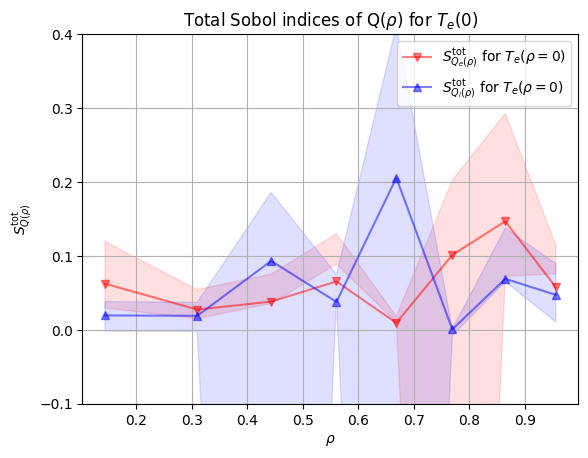

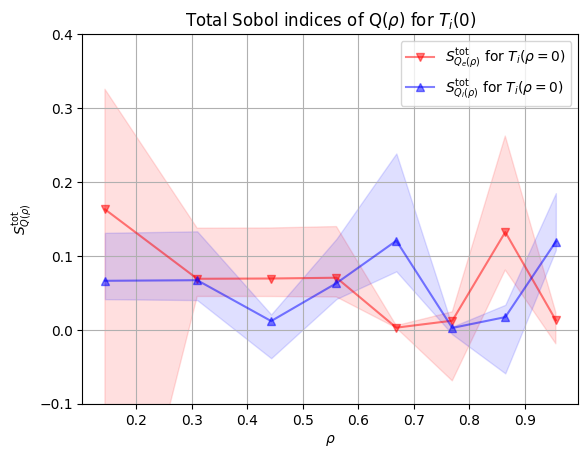

In [6]:
# Sobol indices for aleatoric algorithm (depends on previous 2 blocks)

alpha_transp = 0.5

ind_coords = [0, 15, 30, 45, 57, 67, 77, 87, 95]
ft_coords = [0.143587306141853 , 0.309813886880875 , 0.442991137504578 , 0.560640752315521 , 0.668475985527039 , 0.769291400909424 , 0.864721715450287 , 0.955828309059143]
species = ['e', 'i']

color_step = 0.1
color_num = 10

sp_cmaps = {'e':[(1.-color_step*i, 0., color_step*i ) for i in range(0,color_num)], 
            'i':[(color_step*i ,   0., 1.-color_step*i ) for i in range(0,color_num)],
            'a':[(1.-color_step*3*i, 0., color_step*3*i) for i in range(0,color_num)]}

sp_mmap = {'e':'v', 'i':'^'}


# #) D
# result_filename_list = ['../results_aletoric_20240222/result_aleatoric_wf_cv0.01.pickle', '../results_aletoric_20240222/result_aleatoric_wf_cv0.05.pickle', '../results_aletoric_20240222/result_aleatoric_wf_cv0.1.pickle', '../results_aletoric_20240222/result_aleatoric_wf_cv0.2.pickle', '../results_aletoric_20240222/result_aleatoric_wf_cv0.25.pickle']
# cov_inputs = [float(".".join([f.split('.')[-3][-1],f.split('.')[-2]])) for f in result_filename_list]
# output_columns =  ["te_value_0", "te_value_15", "te_value_30", "te_value_45", "te_value_57", "te_value_67", "te_value_77", "te_value_87", "te_value_95", 
#                    "ti_value_0", "ti_value_15", "ti_value_30", "ti_value_45", "ti_value_57", "ti_value_67", "ti_value_77", "ti_value_87", "ti_value_95",]

# E) GEM 8*3**4 data
result_filename_list = ['../results_aleatoric_gem_data/result_aleatoric_wf_ns32_cv0.1.pickle']
cov_inputs = [float(".".join([f.split('.')[-3][-1],f.split('.')[-2]])) for f in result_filename_list]
ind_coords = [i for i in range(100)]
output_columns = [f"t{sp}_value_{i}" for sp,i in product(['e','i'],ind_coords)]

data_list = []
# should be (at least) 3D data-structure: n_qoi x n_statistics x n_runs
for filename in result_filename_list:
    with open(filename, "rb") as f:
        data = pickle.load(f)
    #data_list.append(data.raw_data['statistical_moments'])
    data_list.append(data.raw_data)

#print(data['sobols_first']['te_value_0']) ###DEBUG

sobols_type = 'sobols_total'
sobol_err_type = 'conf_sobols_total'

# Plot the Sobol indices with each plot/line for a rho value (at 0)

output_columns_plot = ['te_value_0', 'ti_value_0']

k=-1
data = data_list[k]
for qoi_i,qoi in enumerate(output_columns_plot):

    fig_sobcov, ax_sobcov = plt.subplots()

    words_out = qoi.split('_')
    sp_out = words_out[0][1]
    coord_out = int(words_out[-1])

    sobol_array_tot = np.array([data[sobols_type][qoi][f"Q{sp_in}_{n_ft}"][0][0] for sp_in,n_ft in product(species,[i for i,_ in enumerate(ft_coords)])])
    norm_sob = sobol_array_tot.sum()

    for sp_in in species:
        
        sobol_array_loc = np.array([data[sobols_type][qoi][f"Q{sp_in}_{n_ft}"][0][0] for n_ft in range(len(ft_coords))])
        #norm_sob = sobol_array_loc.sum() # norm should be across all inputs (for all species)
        sobol_array_loc = sobol_array_loc / norm_sob

        # plot Sob_T0 (CV_Q_rho)
        ax_sobcov.plot(ft_coords,
                    sobol_array_loc, 
                    alpha=alpha_transp,
                    color=sp_cmaps[sp_in][0],
                    marker=sp_mmap[sp_in],
                    label=f"$S_{{Q_{sp_in}(\\rho)}}^{{\\mathrm{{tot}}}}$ for $T_{sp_out}(\\rho=0)$"
                    )

        # Plot the confidence intervals for Sobol indices
        sobol_errlo_array_loc = np.array([data[sobol_err_type][qoi][f"Q{sp_in}_{n_ft}"]['low'][0][0] for n_ft in range(len(ft_coords))])             
        sobol_errhi_array_loc = np.array([data[sobol_err_type][qoi][f"Q{sp_in}_{n_ft}"]['high'][0][0] for n_ft in range(len(ft_coords))])            
        norm_lo = sobol_errlo_array_loc.sum()
        norm_hi = sobol_errhi_array_loc.sum()
        sobol_errlo_array_loc = sobol_errlo_array_loc / norm_sob
        sobol_errhi_array_loc = sobol_errhi_array_loc / norm_sob

        ax_sobcov.fill_between(ft_coords,
                    sobol_errlo_array_loc,
                    sobol_errhi_array_loc, 
                    alpha=0.25*alpha_transp,
                    color=sp_cmaps[sp_in][0],
                    #label=f"CI",
                    )

    ax_sobcov.set_xlabel(f"$\\rho$")
    ax_sobcov.set_ylabel(f"$S_{{Q(\\rho)}}^{{\\mathrm{{tot}}}}$")
    ax_sobcov.set_title(f"Total Sobol indices of Q($\\rho$) for $T_{sp_out}(0)$")
    ax_sobcov.grid('both')
    ax_sobcov.legend(loc='best')
    ax_sobcov.set_ylim(ymin=-0.1, ymax=0.4)
    fig_sobcov.savefig(f"gem0surr_aleatoric_sobol_rho_{qoi}.pdf")


In [10]:
# filename = '../result_aleatoric_wf.pickle.20240220_1750'
# with open(filename, "rb") as f:
#     data = pickle.load(f)

# for k,v in data.raw_data['statistical_moments'].items():
#     print(v['std'][0][0])

# for k,v in data.raw_data['statistical_moments'].items():
#     print(k)

data.raw_data.keys()

dict_keys(['statistical_moments', 'percentiles', 'sobols_first', 'sobols_total', 'conf_sobols_first', 'conf_sobols_total'])

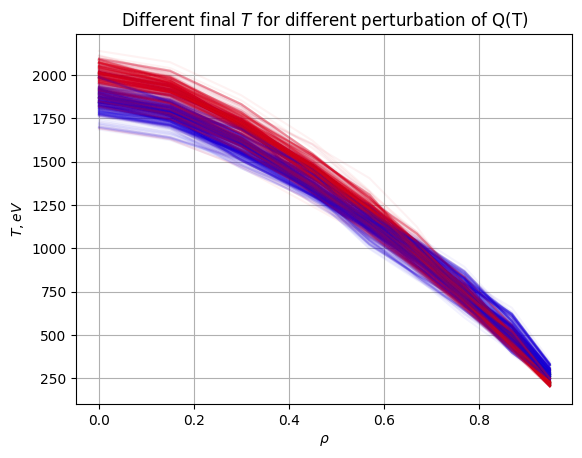

In [150]:
# Plotting various samples of Aleatoric algo
# (depends on previous)

import numpy as np
from matplotlib import pyplot as plt
import pickle

from cycler import cycler

ind_coords = [0, 15, 30, 45, 57, 67, 77, 87, 95]
ft_coords = [0.143587306141853 , 0.309813886880875 , 0.442991137504578 , 0.560640752315521 , 0.668475985527039 , 0.769291400909424 , 0.864721715450287 , 0.955828309059143]
species = ['e', 'i']

alpha_transp = 0.05
color_step = 0.03
color_num = 10
sp_cmaps = [[(1.-color_step*i, 0.0, color_step*i  ) for i in range(0,color_num)], 
            [(color_step*i,    0.0, 1-color_step*i) for i in range(0,color_num)]]

# Read the files
# # A)
# result_filename_list = ['../result_aleatoric_wf.pickle.20240220_1750', '../result_aleatoric_wf.pickle.20240220_1817'] 
# cov_inputs = [0.1,] # 0.05 # 0.25]

# # B)
# result_filename_list = ['../result_aleatoric_wf_cv0.01.pickle', '../result_aleatoric_wf_cv0.05.pickle']
# cov_inputs = [0.01, 0.05]

# C)
result_filename_list = ['../results_aletoric_20240222/result_aleatoric_wf_cv0.01.pickle', '../results_aletoric_20240222/result_aleatoric_wf_cv0.05.pickle', '../results_aletoric_20240222/result_aleatoric_wf_cv0.1.pickle', '../results_aletoric_20240222/result_aleatoric_wf_cv0.2.pickle', '../results_aletoric_20240222/result_aleatoric_wf_cv0.25.pickle']
cov_inputs = [float(".".join([f.split('.')[-3][-1],f.split('.')[-2]])) for f in result_filename_list]

output_columns =  ["te_value_0", "te_value_15", "te_value_30", "te_value_45", "te_value_57", "te_value_67", "te_value_77", "te_value_87", "te_value_95", 
                   "ti_value_0", "ti_value_15", "ti_value_30", "ti_value_45", "ti_value_57", "ti_value_67", "ti_value_77", "ti_value_87", "ti_value_95",]

data_list = []
# should be (at least) 3D data-structure: n_qoi x n_statistics x n_runs
for filename in result_filename_list:
    with open(filename, "rb") as f:
        data = pickle.load(f)
    #data_list.append(data.samples[output_columns])
    data_list.append(data)

# Exemplary run - last run with the highest uncertainty
k = -1

# Plot recomputed STD per column - TODO USE FURTHER FOR A CHECK
avgs = [data_list[k].samples[col].mean() for col in output_columns]
stds = [data_list[k].samples[col].std()  for col in output_columns]
covs = [std / abs(avg) for avg,std in zip(avgs,stds)]
#print(f"CV for {col}: {cov}")

# Plot different realisations of final core temperature profiles
fig, ax = plt.subplots()

x = np.array([coord/100. for coord in ind_coords])
for run_k, row_data in data_list[k].samples.iterrows():
    for sp_m,sp in enumerate(species):
        y = np.array([row_data[f"t{sp}_value_{coord}"] for coord in ind_coords])

        ax.plot(x, y, 
                alpha=alpha_transp,
                c=sp_cmaps[sp_m][run_k%color_num],
                )
        
        # TODO plot only min-max fill_between spread?

# # special treatment of the last element to set up labels
# row_k_l, row_data_k = data_list[k].iterrows().tail()
# for sp_m,sp in enumerate(species):
#     y = np.array([row_data[f"t{sp}_value_{coord}"] for coord in ind_coords])
        
#     ax.plot(x, y, 
#             alpha=alpha_transp,
#             c=sp_cmaps[sp_m][run_k%color_num],
#             label=f"$T_{sp}$",
#             )

ax.set_xlabel(f"$\\rho$")
ax.set_ylabel(f"$T, eV$")
ax.set_title(f"Different final $T$ for different perturbation of Q(T)")
fig.savefig(f"gem0sur_aleatoric_samples.pdf")


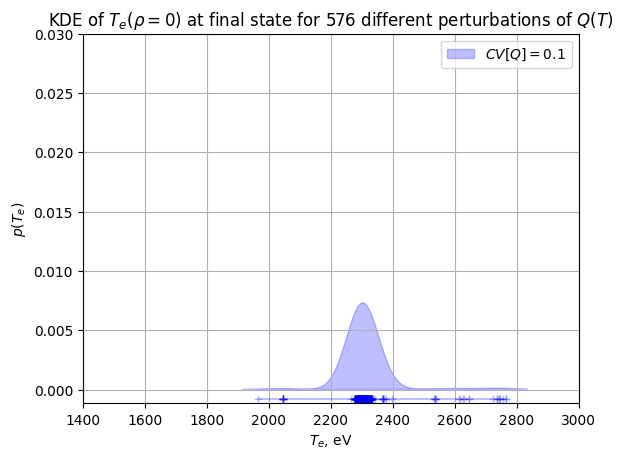

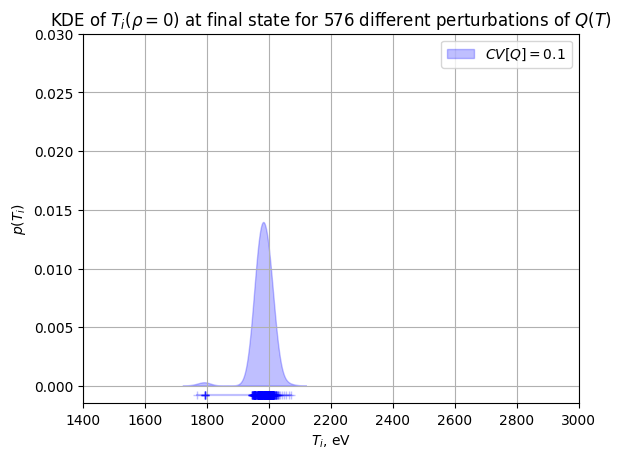

In [11]:
# Plot the KDE of T_0: look up /basicad/da_utils.py
from sklearn.neighbors import KernelDensity

# # D)
# output_columns =  ["te_value_0", "te_value_15", "te_value_30", "te_value_45", "te_value_57", "te_value_67", "te_value_77", "te_value_87", "te_value_95", 
#                    "ti_value_0", "ti_value_15", "ti_value_30", "ti_value_45", "ti_value_57", "ti_value_67", "ti_value_77", "ti_value_87", "ti_value_95",]
# # Get the data 
# result_filename_list = ['../results_aletoric_20240222/result_aleatoric_wf_cv0.01.pickle', '../results_aletoric_20240222/result_aleatoric_wf_cv0.05.pickle', '../results_aletoric_20240222/result_aleatoric_wf_cv0.1.pickle', '../results_aletoric_20240222/result_aleatoric_wf_cv0.2.pickle', '../results_aletoric_20240222/result_aleatoric_wf_cv0.25.pickle']
# cov_inputs = [float(".".join([f.split('.')[-3][-1],f.split('.')[-2]])) for f in result_filename_list]
# # cov_inputs = [0.05, 0.1,] 
# # cov_inputs = [0.01, 0.05]

# E) GEM 8*3**4 data
result_filename_list = ['../results_aleatoric_gem_data/result_aleatoric_wf_ns32_cv0.1.pickle']
cov_inputs = [float(".".join([f.split('.')[-3][-1],f.split('.')[-2]])) for f in result_filename_list]
ind_coords = [i for i in range(100)]
output_columns = [f"t{sp}_value_{i}" for sp,i in product(['e','i'],ind_coords)]

data_list = []
# should be (at least) 3D data-structure: n_qoi x n_statistics x n_runs
for filename in result_filename_list:
    with open(filename, "rb") as f:
        data = pickle.load(f)
    data_list.append(data.samples[output_columns])

# General independent params

ind_coords = [0, 15, 30, 45, 57, 67, 77, 87, 95]
ft_coords = [0.143587306141853 , 0.309813886880875 , 0.442991137504578 , 0.560640752315521 , 0.668475985527039 , 0.769291400909424 , 0.864721715450287 , 0.955828309059143]
species = ['e', 'i']

n_scan_tries = len(cov_inputs)

n_runs = len(data_list[0].index)

ylim = 0.15 #n_runs #fraction is for KDE
xlim = (1650., 2500.)

ylim = 0.03 #n_runs #fraction is for KDE
xlim = (1400., 3000.)

dist_list  = [ylim*-2.5E-2*(i+1) for i in range(n_scan_tries)]
color_list = ['b', 'r', 'g', 'c', 'm', 'y']

alpha_transp = 0.25

nbins = 32
nbins = 64

resol = 1024
expand_factor = 0.025

coord = 0

kde_kernel = 'gaussian' #'tophat'

for sp in species:

    fig, ax = plt.subplots()

    for i in range(len(data_list)):

        data = data_list[i][f"t{sp}_value_{coord}"]
        data = np.array(data)

        # make a KDE model: TODO automatic bw estimator
        bw = (data.max() - data.min()) / (nbins//4)
        kde = KernelDensity(kernel=kde_kernel, bandwidth=bw).fit(data)

        # prepare data for plotting
        x_plot = np.linspace(data.min()*(1-expand_factor),data.max()*(1+expand_factor), resol)[:, np.newaxis]
        log_dens = kde.score_samples(x_plot)

        # histogram
        norm = data.sum()
        # ax.hist(data, bins=nbins, 
        #         density=True, histtype='stepfilled', 
        #         alpha=alpha_transp, color=color_list[i], label=f"$CV[Q]={cov_inputs[i]}$")

        # KDE plot
        ax.fill(x_plot[:, 0], np.exp(log_dens), 
                alpha=alpha_transp,
                color=color_list[i],
                label=f"$CV[Q]={cov_inputs[i]}$")

        # pluses for individual readings
        ax.plot(data[:, 0], np.full(data.shape[0], dist_list[i]), marker="+", color=color_list[i], alpha=alpha_transp)
    
    ax.set_ylim(ymax=ylim)
    ax.set_xlim(xlim)

    ax.legend(loc='best')
    ax.set_xlabel(f"$T_{sp}$, eV")
    ax.set_ylabel(f"$p(T_{sp})$") #(f"$p(\\cdot)$")
    ax.set_title(f"KDE of $T_{sp}(\\rho={coord})$ at final state for {n_runs} different perturbations of $Q(T)$")

    fig.savefig(f"gem0sur_aleatoric_kde_t{sp}.pdf")


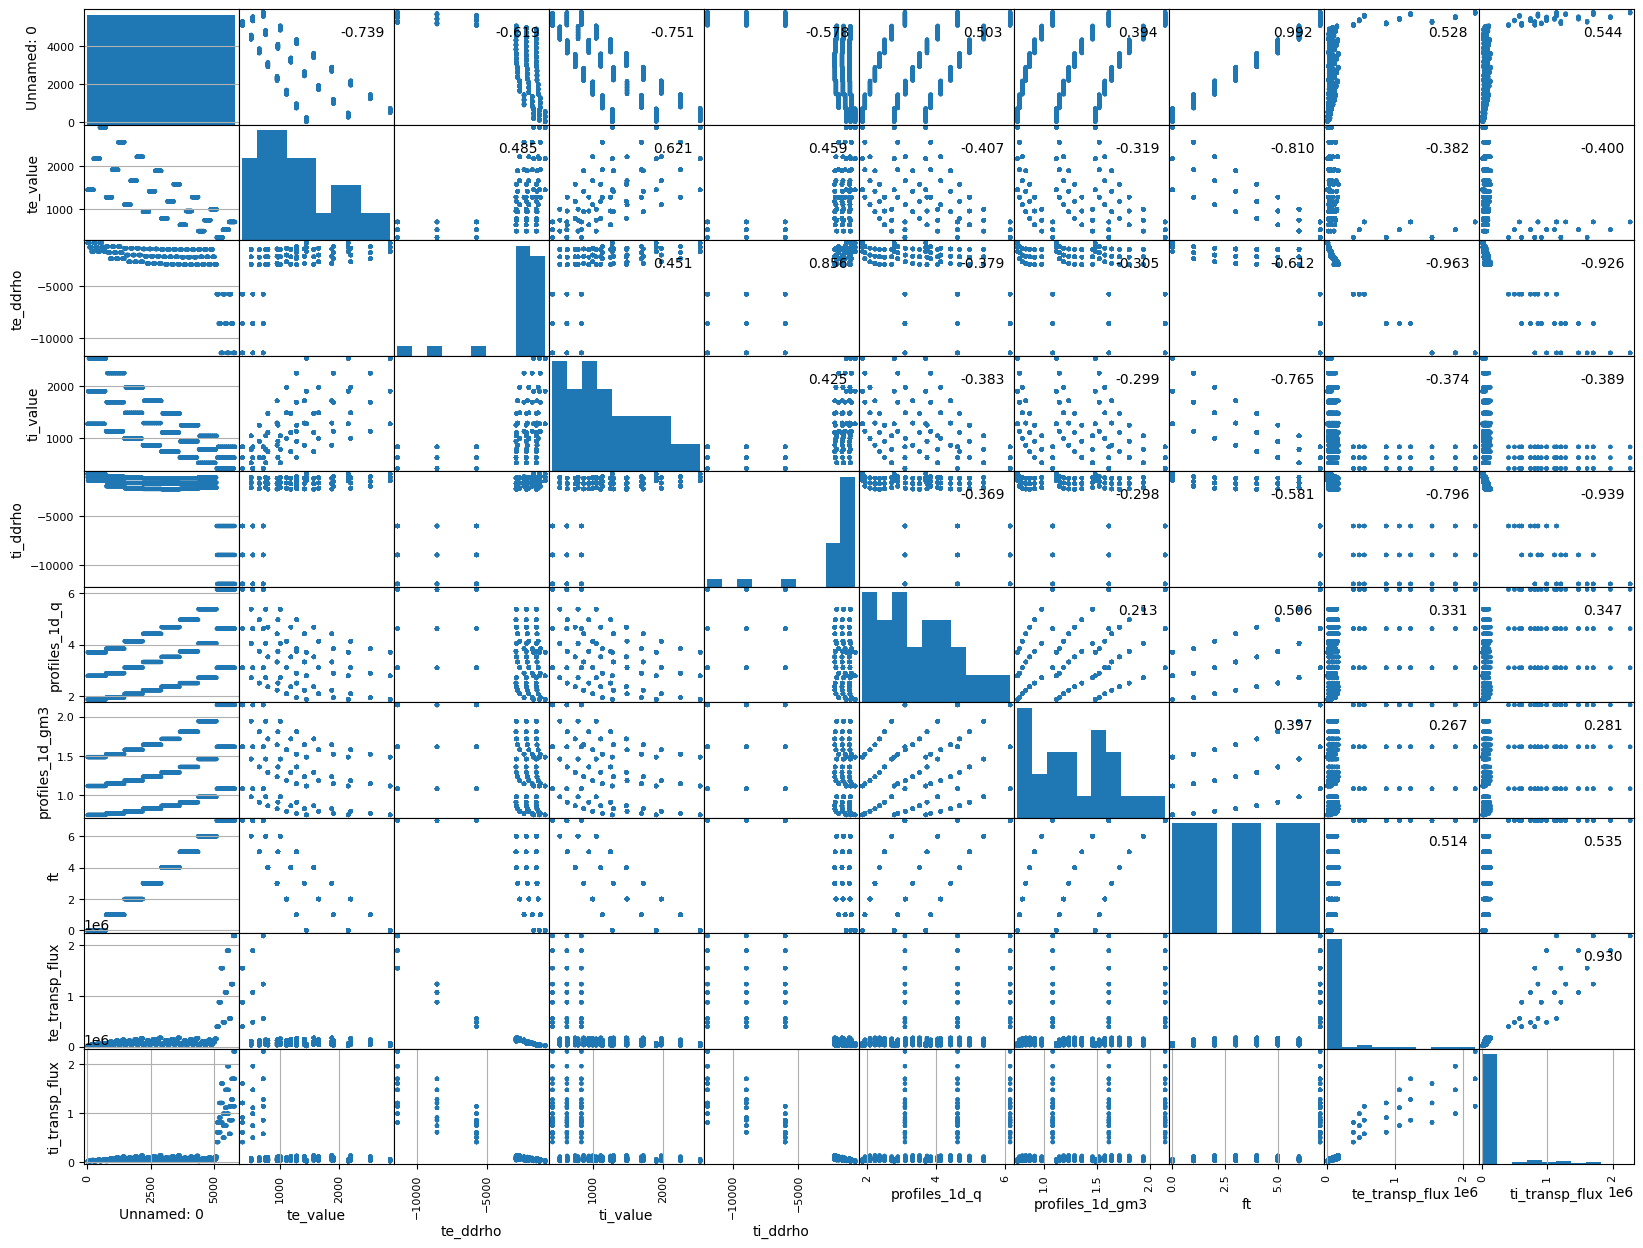

                            OLS Regression Results                            
Dep. Variable:         ti_transp_flux   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.645e+04
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:45:43   Log-Likelihood:                -74825.
No. Observations:                5832   AIC:                         1.497e+05
Df Residuals:                    5825   BIC:                         1.497e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.985e+05   8106.262    -

In [13]:
# Check the correlations in pyGEM0 data

filename = "gem0py_new_eqtest_1.csv"

# reading and selecting data
data = pd.read_csv(filename)
selected_cols = ['profiles_1d_q', 'profiles_1d_gm3', 'ti_transp_flux', 'te_transp_flux']
#data = data[selected_cols]

# plotting scatter-s and histograms
axes = pd.plotting.scatter_matrix(data, alpha=0.5, diagonal='hist', figsize=(20,15))

corr = np.array(data.corr())
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()

# Anova
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm = ols('ti_transp_flux ~ profiles_1d_q + profiles_1d_gm3 + ti_value + te_value + ti_ddrho + te_ddrho', data=data).fit()

print(lm.summary())
#print(sm.stats.anova_lm(cw_lm, typ=2))


In [1]:
# Time required for diffenrent cases of turbulence code (GEM) usage

n_mins_p_h = 60 # do not change :)

n_corese_p_node = 40

n_ft = 8

# Case 1: generate a GEM scan to perfrom parametric UQ and make a dataset (@COBRA)

n_par_turb = 4
n_point_p_par_turb = 3

n_cores_per_turb = 32
t_turb_step_min_32c = 3.5 # this number should be re-recorded

n_steps_p_subm = 15
n_subm = 45

n_nodes_p_subm = 27
t_sumb_h = 20

coef_comp_eff = n_cores_per_turb/n_corese_p_node

t_1_0 = n_cores_per_turb * (t_turb_step_min_32c/n_mins_p_h)
print(f"time for a single GEM iteration (@COBRA):\n {t_1_0:.4f} [CPUh]")

t_1_1 = (n_steps_p_subm * n_subm) * t_1_0
print(f"time for a single GEM run (@COBRA):\n {t_1_1:_} [CPUh]")

t_1 = (n_point_p_par_turb**n_par_turb) * n_ft * t_1_1
print(f"time spent in computation via per run count t_1=\n {t_1:_} [CPUh]")

t_1_v2 = (n_nodes_p_subm * n_corese_p_node) * (t_sumb_h * n_subm) * coef_comp_eff
print(f"time spent in computation via SLURM t_1_v2=\n {t_1_v2:_} [CPUh]")
# 40[c/n]*27[n]*20[h]*45[subm.]=972000CPUh

t_turb_step_recal = t_turb_step_min_32c * t_1_v2 / t_1
print(f"//recompute of turbulence itearation duration: {t_turb_step_recal:.3f} [mins]")

# Case 2: perform (parametric studies) for a GEM-WF (@MARCONI)

n_corese_p_node = 48

n_cores_per_turb_2 = 1024
t_turb_step_min_1024c = 0.5 # from Onnie's paper: 27s

n_steps = 1500
t_subm_h_2 = 19

n_subm_2 = 5

print(f"//nodes used?: {n_cores_per_turb_2/n_corese_p_node:.3f}")

# * (t_turb_step_min_1024c/n_mins_p_h)
t_2_1 = n_cores_per_turb_2  * (t_subm_h_2 * n_subm_2)
print(f"time for single MFW run t_2_1=\n {t_2_1:_} [CPUh]")

n_par_mfw = 6
n_point_p_par_mfw = 3
n_r_mfw = n_point_p_par_mfw ** n_par_mfw

t_4 = n_r_mfw * t_2_1
print(f"time for a MFW UQ t_2=\n {t_4:_} [CPUh]")

print(f" time spent ration f=\n {t_1/t_4:.4f}")


time for a single GEM iteration (@COBRA):
 1.8667 [CPUh]
time for a single GEM run (@COBRA):
 1_260.0 [CPUh]
time spent in computation via per run count t_1=
 816_480.0 [CPUh]
time spent in computation via SLURM t_1_v2=
 777_600.0 [CPUh]
//recompute of turbulence itearation duration: 3.333 [mins]
//nodes used?: 21.333
time for single MFW run t_2_1=
 97_280 [CPUh]
time for a MFW UQ t_2=
 70_917_120 [CPUh]
 time spent ration f=
 0.0115


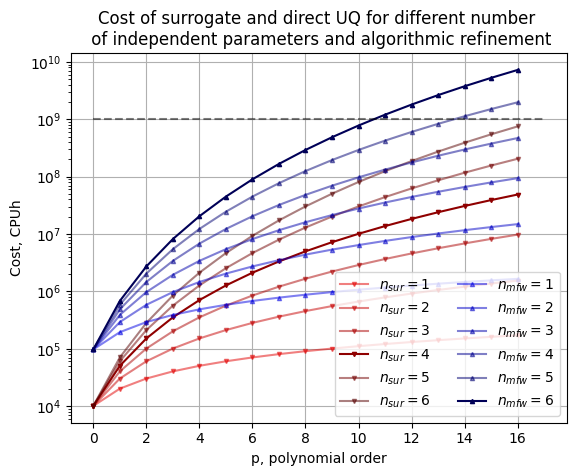

In [11]:
# Plots for the Cost vs pol-order for WF and SUR
import math as m
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
cstep = 0.11
a_transp = 0.5
masi = 3

ax.set_ylabel(f"Cost, CPUh")
ax.set_xlabel(f"p, polynomial order")
ax.set_title(f"Cost of surrogate and direct UQ for different number \n of independent parameters and algorithmic refinement")

pmin=0
pmax=17
p_array = np.array([p for p in range(pmin,pmax)])

for n_par_turb_loc in range(1, n_par_turb+3):

    # Set up the depdenency and visuals for micromodel
    # func_sur = lambda p: t_1_1* (p+1)**n_par_turb_loc
    func = lambda p: n_ft*t_1_1 * m.comb(p+n_par_turb_loc, n_par_turb_loc)
    label = f"$n_{{sur}}={n_par_turb_loc}$"
    color = (1-cstep*n_par_turb_loc,0.,0.)
    marker = 'v'

    # Highlight the actual number of parameters
    if n_par_turb_loc == n_par_turb:
        a_transp_loc = 1.
    else:
        a_transp_loc = a_transp

    y = [func(p) for p in p_array]
    ax.semilogy(p_array, y, 
                color=color, 
                alpha=a_transp_loc,
                marker=marker,
                markersize=masi,
                label=label)

for n_par_mfw_loc in range(1, n_par_mfw+1):

    # Set up the depdenency and visuals for macromodel
    # func_mfw  = lambda p: t_2_1*(p+1)**n_par_mfw_loc
    func = lambda p: t_2_1 * m.comb(p+n_par_mfw_loc, n_par_mfw_loc)
    label = f"$n_{{mfw}}={n_par_mfw_loc}$"
    color = (0.,0.,1-cstep*n_par_mfw_loc)
    marker = '^'

    # Highlight the actual number of parameters
    if n_par_mfw_loc == n_par_mfw:
        a_transp_loc = 1.
    else:
        a_transp_loc = a_transp

    y = [func(p) for p in p_array]
    ax.semilogy(p_array, y, 
                color=color, 
                alpha=a_transp_loc,
                marker=marker,
                markersize=masi,
                label=label)

ax.legend(ncol=2, loc='lower right')

fig.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# add horisontal line for realistic costs
y_line = 1E+9
ax.hlines(y=y_line, xmin=pmin, xmax=pmax, color='k', linestyle='--', alpha=a_transp)

fig.savefig('cost_nn_1.pdf')


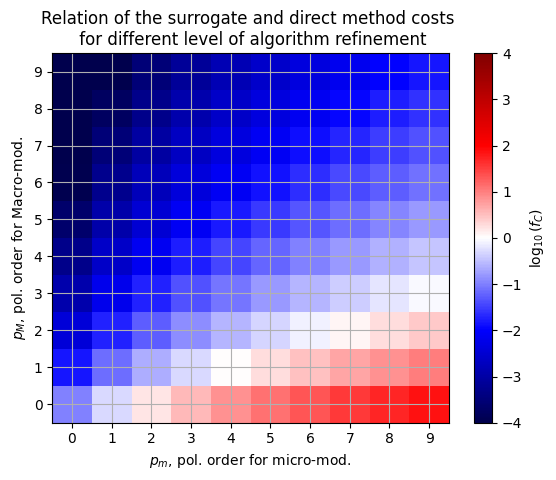

In [14]:
# Plot s for fraction of surrogate cost as a function of polynomial orders
import itertools
import numpy as np
#import seaborn as sns

fig, ax = plt.subplots()

vlev = 4

ax.set_xlabel(f"$p_{{m}}$, pol. order for micro-mod.")
ax.set_ylabel(f"$p_{{M}}$, pol. order for Macro-mod.")
ax.set_title(f"Relation of the surrogate and direct method costs \n for different level of algorithm refinement")

# n_par_mfw_loc = n_par_turb_loc
# func_sur = lambda p: t_1_1 * m.comb(p+n_par_turb_loc, n_par_turb_loc)
# func_mfw  = lambda p: t_2_1 * m.comb(p+n_par_mfw_loc, n_par_mfw_loc)

f = lambda p1,p2: m.log10( n_ft*t_1_1 * m.comb(p1+n_par_turb, n_par_turb)/ (t_2_1 * m.comb(p2+n_par_mfw, n_par_mfw)) )

npar = 10
p1s = p2s = [p for p in range(npar)]
#p2s = [p for p in range(npar)]

y = [[f(p1,p2) for p1 in p1s] for p2 in p2s]
y = np.array(y)

im = ax.pcolormesh(
          p1s, p2s,
          y,
          #color=(1-0.1*n_par_turb_loc,0.,0.), 
          cmap='seismic',
          #label=f"$n_{{sur}}={n_par_turb_loc}$",
          vmin=-vlev,
          vmax=+vlev,
          #snap=True,
          #shading='nearest',
          linewidth=0,
        )

im.set_edgecolor('face')

ax.set_xticks(p1s)
ax.set_yticks(p2s)

#ax.legend()
#fig.gca().invert_yaxis()
cbar = fig.colorbar(im)
cbar.set_label(f"$\\log_{{10}} (f_{{C}})$")

fig.savefig('cost_pp_1.pdf')

In [5]:
# Revive the old eUQ campaign DB adn get statistics out

import easyvvuq as uq

campname = "UQ_8FTgem_"
dbfilename = "campaign_gem8ft_test.db"

camp = uq.Campaign(name=campname,db_location="sqlite:///"+dbfilename)

sampler = camp.get_active_sampler()

output_columns = ["te_transp.flux", "ti_transp.flux"]
vary = sampler.vary.vary_dict
pol_order = sampler.polynomial_order

run_ids_fromdb = [x[4:] for x in camp.campaign_db.run_ids()]
#print(run_ids_fromdb)

sampler_new = uq.sampling.PCESampler(vary=vary, polynomial_order=pol_order)
analysis_new = uq.analysis.PCEAnalysis(sampler=sampler_new, qoi_cols=output_columns)

#res = camp.apply_analysis(analysis_new)

nfts = 7 #8
data = {}

for nft in range(nfts):
    #print(f"nft = {nft}") ###DEBUG
    
    appname = f"gem_FT{nft}"
    run_result = camp.campaign_db.get_results(appname, nft+1)
    analysis_result = analysis_new.analyse(run_result)
    #print(analysis_result.__dict__)

    data[f"ft{nft}"] = analysis_result.raw_data


In [65]:
# print(data[f"ft1"])

{'statistical_moments': {'te_transp.flux': {'mean': array([124796.1758046]), 'var': array([9.48757277e+09]), 'std': array([97404.17225614])}, 'ti_transp.flux': {'mean': array([431009.0825614]), 'var': array([1.61574346e+11]), 'std': array([401963.11583144])}}, 'percentiles': {'te_transp.flux': {'p01': -47761.2116300995, 'p10': 13781.089990999219, 'p50': 109123.83733062293, 'p90': 263687.11317119974, 'p99': 397930.8315190341}, 'ti_transp.flux': {'p01': -204694.71251475936, 'p10': -7607.797331204289, 'p50': 349471.6371086471, 'p90': 1043264.2320838568, 'p99': 1554209.529032648}}, 'sobols_first': {'te_transp.flux': {'te.value': array([0.11196874]), 'ti.value': array([0.18088844]), 'te.ddrho': array([0.13247785]), 'ti.ddrho': array([0.46782461])}, 'ti_transp.flux': {'te.value': array([0.26243455]), 'ti.value': array([0.13078856]), 'te.ddrho': array([0.00365384]), 'ti.ddrho': array([0.49582327])}}, 'sobols_second': {'te_transp.flux': {'te.value': array([[0.        ],
       [0.00237999],
  

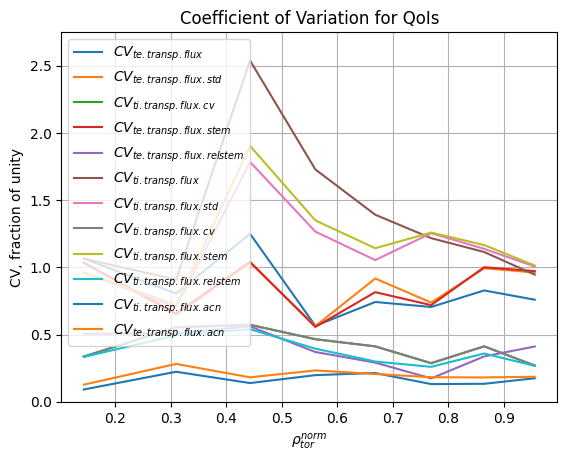

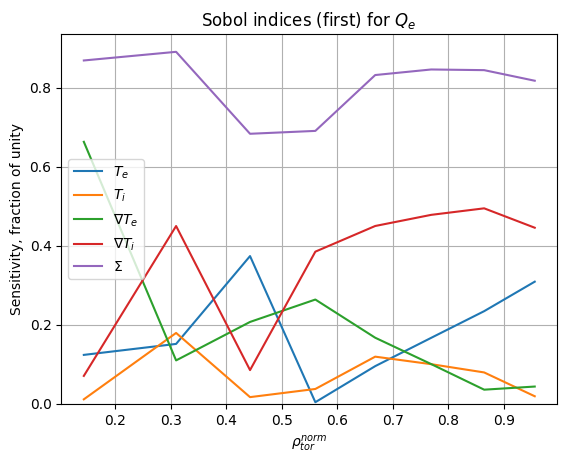

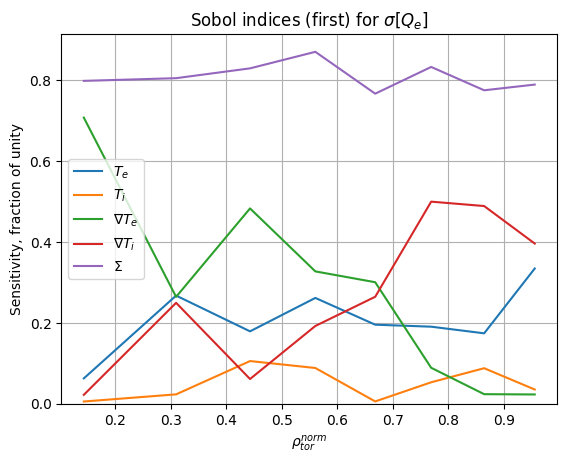

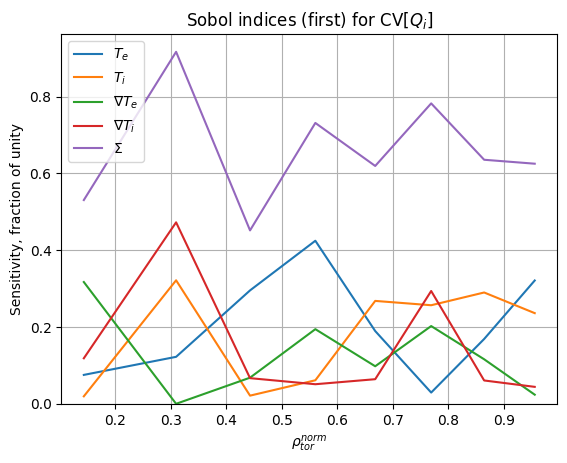

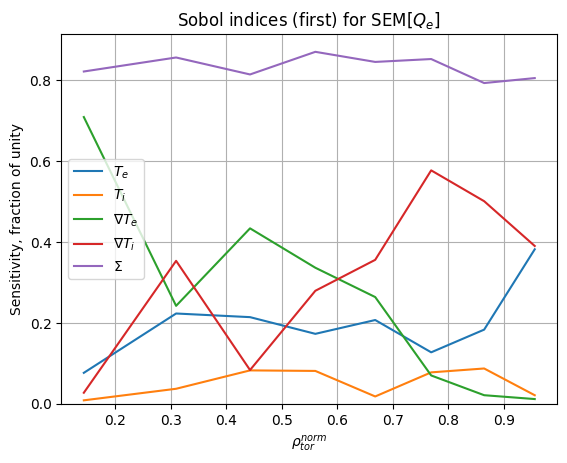

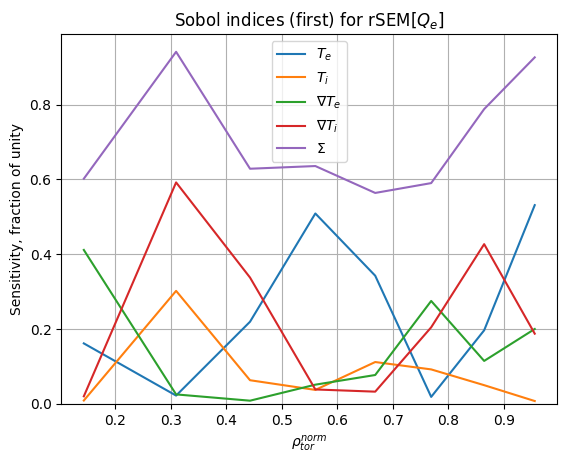

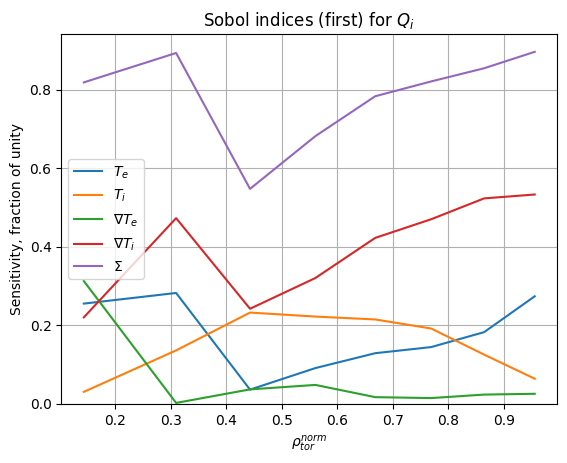

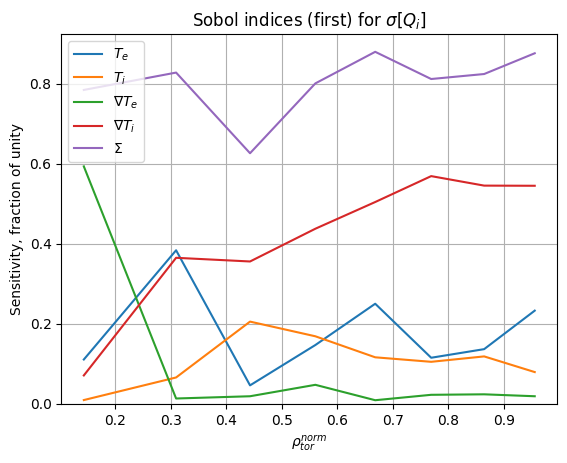

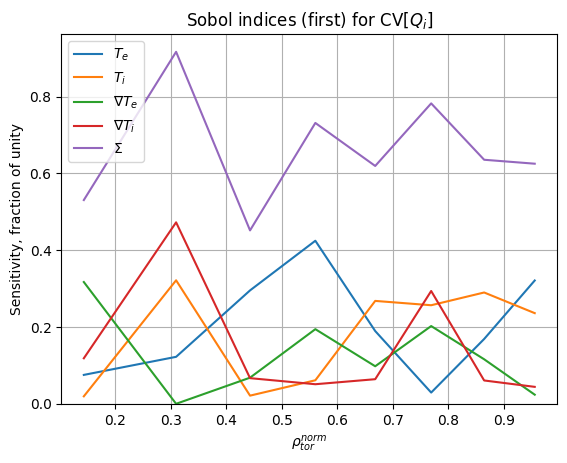

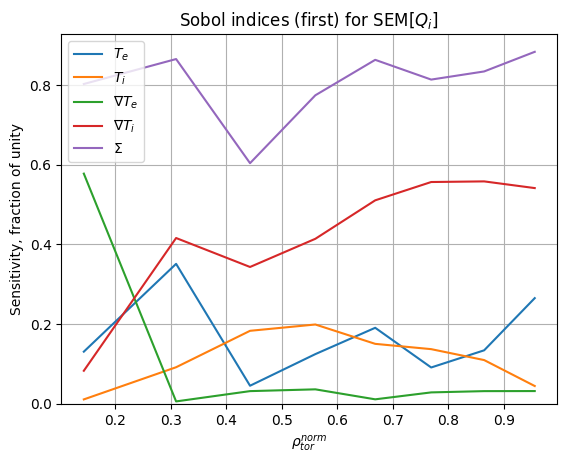

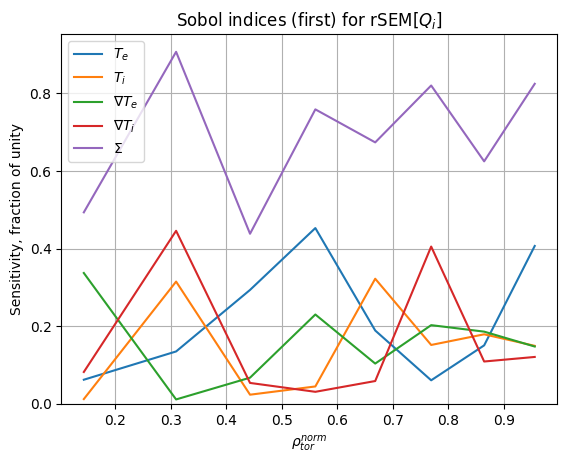

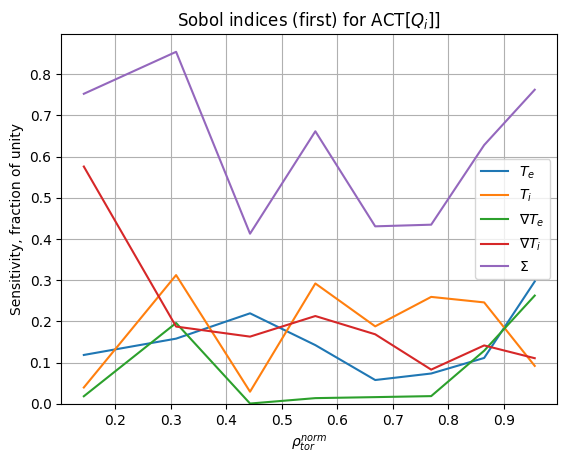

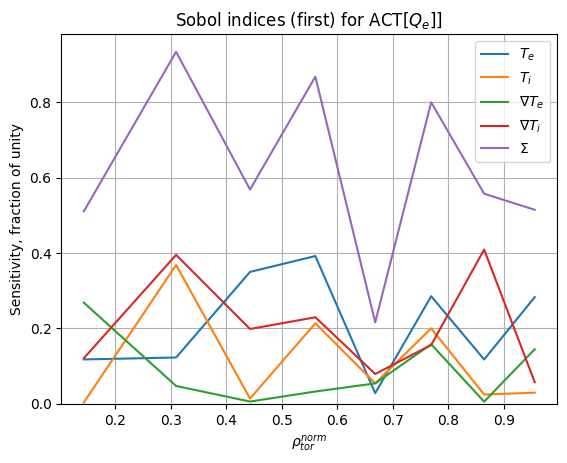

In [61]:
# Plot the retrived GEM-8ft data (needs data object)

nfts = 8

ft_coords = [0.143587306141853 , 0.309813886880875 , 0.442991137504578 , 0.560640752315521 , 0.668475985527039 , 0.769291400909424 , 0.864721715450287 , 0.955828309059143]

inputs = ['te.value',  'ti.value', 'te.ddrho', 'ti.ddrho']

# A) original outputs
qois = ['te_transp.flux', 'ti_transp.flux']
# B) Time-trace-analysed outputs
qois = ['te_transp_flux', 'te_transp_flux_std', 'ti_transp_flux_cv', 'te_transp_flux_stem', 'te_transp_flux_relstem', 'ti_transp_flux', 'ti_transp_flux_std', 'ti_transp_flux_cv', 'ti_transp_flux_stem', 'ti_transp_flux_relstem', 'ti_transp_flux_acn', 'te_transp_flux_acn']


sobol_type = 'sobols_first'
sobol_err_type = 'conf_sobols_total'


sobols = {}
stats = {}
#xs = np.arange(nfts)
xs = np.array(ft_coords)

# Plotting the coefficient of variation for Qe,i
fig_st,ax_st = plt.subplots()

for qoi in qois:

    fig_sob,ax_sob = plt.subplots()

    sobols[qoi] = {}

    qoi_plotname = qoi.replace('_','.')
    
    for input in inputs:
    
        sobols[qoi][input] = {}
        sobols[qoi][input][sobol_type] = np.zeros(nfts)
        # sobols[qoi][input][sobol_err_type] = {}
        # sobols[qoi][input][sobol_err_type]['low'] = np.zeros(nfts)
        # sobols[qoi][input][sobol_err_type]['high'] = np.zeros(nfts)

        for nft in range(nfts):
            sobols[qoi][input][sobol_type][nft] = data[f"ft{nft}"][sobol_type][qoi][input][0]
            # sobols_first[qoi][input][sobol_err_type]['low'][nft]  = data[f"ft{nft}"][sobol_err_type][qoi][input]['low'][0]
            # sobols_first[qoi][input][sobol_err_type]['high'][nft] = data[f"ft{nft}"][sobol_err_type][qoi][input]['high'] [0]

            #print(data[f"ft{nft}"][sobol_type][qoi][input][0]) ###DEBUG 

        norm = sobols[qoi][input][sobol_type].sum()
        #sobols[qoi][input][sobol_type] = sobols[qoi][input][sobol_type] / norm
        
        ax_sob.plot(xs, 
                    sobols[qoi][input][sobol_type] , 
                    #label=f"$S_{{{qoi_plotname}}}^{{{input}}}$"
                    label=lookup_names_short[input],
                    )

    stats[qoi] = {}
    stats[qoi]['mean'] = np.zeros(nfts)
    stats[qoi]['std'] = np.zeros(nfts)
    stats[qoi]['cov'] = np.zeros(nfts)

    for nft in range(nfts):
        stats[qoi]['mean'][nft] = data[f"ft{nft}"]['statistical_moments'][qoi]['mean'][0]
        stats[qoi]['std'][nft]  = data[f"ft{nft}"]['statistical_moments'][qoi]['std'][0]
        stats[qoi]['cov'][nft]  = stats[qoi]['std'][nft] / stats[qoi]['mean'][nft]
 
    # computing sums of sobol indices
    sobols[qoi]['sum'] = np.array([ sum([ sobols[qoi][input][sobol_type][nft] for input in inputs ]) for nft in range(nfts) ])
    # sobols[qoi]['sum'] = np.zeros(nfts)
    # for nft in range(nfts):
    #     for input in inputs:
    #         sobols[qoi]['sum'][nft] += sobols[qoi][input][sobol_type][nft] 
    ax_sob.plot(xs, sobols[qoi]['sum'], label=f"$\Sigma$")

    ax_sob.legend(loc='best')
    #ax_sob.set_xlabel(f"Flux tube number")
    ax_sob.set_xlabel(f"$\\rho_{{tor}}^{{norm}}$")
    ax_sob.set_ylabel(f"Sensitivity, fraction of unity")
    ax_sob.set_ylim(0.0, sobols[qoi]['sum'].max()*1.05)
    sobol_type_short = sobol_type.split("_")[-1] 
    ax_sob.set_title(f"Sobol indices ({sobol_type_short}) for {lookup_names_short[qoi]}")
    fig_sob.savefig(f"gem_data_uq_{sobol_type}_{qoi_plotname}_of_rho.pdf")

    # Plotting the coefficient of variation for Qe,i
    ax_st.plot(xs, 
               stats[qoi]['cov'], 
               label=f"$CV_{{{qoi_plotname}}}$"
               )
    ax_st.legend(loc='best')
    #ax_st.set_xlabel(f"Flux tube number")
    ax_st.set_xlabel(f"$\\rho_{{tor}}^{{norm}}$")
    ax_st.set_ylabel(f"CV, fraction of unity")
    ax_st.set_title(f"Coefficient of Variation for QoIs")
    ax_st.set_ylim(0.0, 2.75)
    fig_st.savefig(f"gem_data_uq_cv_of_rho.pdf")


In [ ]:
# Plot the responses of a (GPR) surrogate - NOR WORKING

import easyvvuq as es

nfts = 8 

foldername = f"surrogate_toplot"

model_name_base = f"{foldername}/gem0py_gpr_"
model_name_sufix = f".pickle"

training_filename = f"{foldername}/gem0py_data.csv"

training_data = pd.read_csv(training_filename)

for nft in range(nfts):

    #fig,ax = plt.subplots()

    saved_model_file_path = f"{model_name_base}{str(i)}{model_name_sufix}"

    campaign = es.Campaign(load_state=True, file_path=saved_model_file_path)

    model = campaign.surrogate

    data_loc = data[data['ft']==nft]

    X = data_loc[xlabels]

    for i,xlabel in enumerate(xlabels):

        fig,ax = plt.subplots(2, 2, i+1)

        x_unique_local = np.unique(X[xlabel])

        # Indices of centre cuts of data - assumes full grid! 
        x_mid_inds_local = x_unique_local.shape[0]/2

        x_mid_vals_local = x_unique_local[x_mid_inds_local]

        y = model.predict(x_mid_vals_local)

        for j,ylabel in enumerate(ylabels):

            ys = y[j]

            ax.plot(xs, ys, label=f"$Q_{}$")

                 

In [24]:
# Split a CSV file from GEM postprocessing script and redistribute results into run folders

import os,sys

res_csv_fileame_tot = "resuq_main_te_transp_flux_all_csldvnei_43.csv"

orig_campaign_foldername = "/ptmp/yyudin/UQ_8FTgem_csldvnei"

output_filename = "timetraces_stats_out.csv"

data = pd.read_csv(res_csv_fileame_tot)

for i,row in enumerate(data.iterrows()):

    # print(row)
    # print(row[-1])
    # print(row.index)

    run_num_n = int(i+1)
    run_num_n_hundred = (run_num_n // 100)

    run_foldername = os.path.join(orig_campaign_foldername, f"runs/runs_0-100000000/runs_0-1000000/runs_0-10000/runs_{run_num_n_hundred*100}-{(run_num_n_hundred+1)*100}" , f"run_{run_num_n}")

    output_filename_loc = os.path.join(run_foldername, output_filename)

    data_loc = row[-1].to_frame().T
    # print(data_loc)

    data_loc['te_transp_flux_cv'] = data_loc['te_transp_flux_std'] / data_loc['te_transp_flux']
    data_loc['ti_transp_flux_cv'] = data_loc['ti_transp_flux_std'] / data_loc['ti_transp_flux']
    data_loc['te_transp_flux_relstem'] = data_loc['te_transp_flux_stem'] / data_loc['te_transp_flux']
    data_loc['ti_transp_flux_relstem'] = data_loc['ti_transp_flux_stem'] / data_loc['ti_transp_flux']

    data_loc.to_csv(output_filename_loc, index=False)
    

In [51]:
# Recollate the results of GEM-8ft campaign according to the new decoder (using time traces stats) 

import easyvvuq as uq

output_filename_new = 'timetraces_stats_out.csv'
output_columns = ['te_transp_flux', 'te_transp_flux_std', 'ti_transp_flux_cv', 'te_transp_flux_stem', 'te_transp_flux_relstem', 'ti_transp_flux', 'ti_transp_flux_std', 'ti_transp_flux_cv', 'ti_transp_flux_stem', 'ti_transp_flux_relstem', 'ti_transp_flux_acn', 'te_transp_flux_acn']

camp_name = 'UQ_8FTgem_'
db_filename = 'campaign_gem8ft_applytimetracesanalysis.db'

nfts = 8

decoder = uq.decoders.RobustCSV(target_filename=output_filename_new, output_columns=output_columns)

actions_new = uq.actions.Actions(uq.actions.Decode(decoder))

campaign = uq.Campaign(name=camp_name, db_location='sqlite:///'+db_filename)

run_ids_fromdb = [x[4:] for x in campaign.campaign_db.run_ids()]

campaign.campaign_db.set_run_statuses(run_ids_fromdb, uq.constants.Status.ENCODED)

data = {}

# Iterate over flux tubes (and apps)
for nft in range(nfts):
    
    appname = f"gem_FT{nft}"
    #print(campaign.list_runs()) ###DEBUG
    #print(campaign.campaign_db.app(appname)) ###DEBUG

    # Get the older sample, create a copy one and a respective analysis
    sampler = campaign.campaign_db.resurrect_sampler(nft+1)

    vary = sampler.vary.vary_dict
    pol_order = sampler.polynomial_order

    sampler_new = uq.sampling.PCESampler(vary=vary, polynomial_order=pol_order)
    analysis_new = uq.analysis.PCEAnalysis(sampler=sampler_new, qoi_cols=output_columns)

    campaign.set_app(appname)
    campaign.set_sampler(sampler, update=True)
    # sampler_id_loc = campaign._active_sampler_id
    # print(sampler_id_loc) ###DEBUG

    # Create actions to decode and execute them
    campaign.replace_actions(app_name=appname,
                    actions=actions_new)
    
    action_pool = campaign.apply_for_each_sample(
                                    actions=actions_new,
                                    status=uq.constants.Status.ENCODED,
                                    sequential=False,
                                                )
    coll_res = action_pool.start().collate()
    
    # # Get the results according to the app via the campaign database
    # run_result = campaign.campaign_db.get_results(
    #                 appname, 
    #                 nft+1, 
    #                 #uq.constants.Status.COLLATED,
    #                 #-1
    #                                             )
    # print(run_result) ###DEBUG
    # analysis_result = analysis_new.analyse(run_result)

    # Get the results according to the app via campaign object API
    # coll_res = campaign.get_collation_result()
    # print(coll_res) ###DEBUG
    print(campaign._active_app['name'])
    print(campaign._active_sampler_id)
    campaign.apply_analysis(analysis_new) 
    analysis_result = campaign.get_last_analysis()

    print(analysis_result.describe()) ###DEBUG

    # Save the collation results as a pickle file
    pickle_filename = f"result_gem8ft_timeseries_ft{nft}.pickle"
    with open(pickle_filename, "bw") as file_pickle:
        pickle.dump(analysis_result, file_pickle)

    # Save the collation results as a dictionary
    data[f"ft{nft}"] = analysis_result.raw_data

gem_FT0
1
       te_transp_flux te_transp_flux_std ti_transp_flux_cv            \
                    0                  0                 0         1   
mean     7.736332e+04       2.101602e+04          0.304936  0.304936   
var      6.802259e+09       4.732689e+08          0.010537  0.010537   
std      8.247581e+04       2.175475e+04          0.102648  0.102648   
1%      -6.088810e+04      -2.022968e+04          0.047836  0.047836   
10%     -1.232985e+04      -4.167655e+03          0.185172  0.185172   
90%      1.948888e+05       5.227031e+04          0.438895  0.438895   
99%      3.041844e+05       7.666283e+04          0.572794  0.572794   
min     -2.379947e+05      -7.639629e+04         -0.287430 -0.287430   
max      5.414020e+05       1.391527e+05          0.833686  0.833686   
median   5.789230e+04       1.797148e+04          0.296383  0.296383   

       te_transp_flux_stem te_transp_flux_relstem ti_transp_flux  \
                         0                      0        

In [65]:
# Heteroschedastic noise for scikit-learn

from sklearn.gaussian_process import GaussianProcessRegressor

from gp_extras.kernels import HeteroscedasticKernel

datafile_name = "gem_new_baseline.csv"

data = pd.read_csv(datafile_name)

X = data[xlabels]
y = data[ylabels]

y_err = data[['te_transp_flux_stem', 'ti_transp_flux_stem']]